# Análise de Emoções nos Hinos da ICM
Este notebook utiliza modelos de NLP para identificar emoções predominantes nos textos dos hinos da coletânea principal da Igreja Cristã Maranata.

O objetivo é classificar os hinos quanto às emoções transmitidas, visualizar a distribuição das emoções e salvar os resultados para futuras análises.

---
**Conteúdo do notebook:**
- Carregamento do modelo de emoções (BERT-pt-emotion)
- Processamento dos textos dos hinos para análise de emoções
- Visualização da distribuição das emoções dominantes
- Estatísticas e exemplos por emoção
- Visualização detalhada (heatmap)
- Extração das 3 emoções mais fortes por hino
- Salvamento dos resultados enriquecidos

Este material é público e pode ser compartilhado para fins de pesquisa, estudo ou divulgação cultural.

# Parte 7 - Análise de Emoção

---

**A seguir:** Carregamento do modelo de emoções e dos dados dos hinos, definição das funções para processamento dos textos e classificação das emoções.

In [18]:
from transformers import pipeline
import pandas as pd
import torch

hinos_analise: pd.DataFrame = pd.read_pickle(
    "..\\assets\\hinos_analise_embeddings_complete.pkl"
)

# Carregar modelo multilíngue de emoções
model_name = "pysentimiento/bert-pt-emotion"
classifier = pipeline(
    "text-classification",
    model=model_name,
    tokenizer=model_name,
    top_k=None,  # Substitui return_all_scores=True (depreciado)
    max_length=512,  # Limite máximo de tokens do BERT
    truncation=True,  # Trunca textos longos automaticamente
    device=-1,  # Força uso da CPU para evitar problemas de memória
)


# Função para juntar e truncar tokens já tratados
def texto_truncado_tokens(tokens, max_tokens=400):
    if not isinstance(tokens, list):
        return ""
    # Trunca a lista de tokens e junta em uma string
    return " ".join(tokens[:max_tokens])


# Classificar emoções usando a coluna token_no_stops
def analisar_emocoes_tokens(tokens):
    try:
        texto = texto_truncado_tokens(tokens)
        if not texto.strip():
            return {}
        resultado = classifier(texto)
        if isinstance(resultado, list) and len(resultado) > 0:
            emocoes_lista = resultado[0]
            if isinstance(emocoes_lista, list):
                return {r["label"]: r["score"] for r in emocoes_lista}
        return {}
    except Exception as e:
        print(f"Erro ao processar texto: {str(e)[:100]}...")
        return {}

Device set to use cpu


---

**A seguir:** Processamento dos hinos em lotes para análise de emoções, salvando os resultados e exibindo amostras dos dados processados.

In [19]:
# Processar todos os hinos (pode demorar alguns minutos)
print("Processando análise de emoções para todos os hinos...")
print("Isso pode levar alguns minutos. Progresso:")

import time

start_time = time.time()

# Processar em lotes para mostrar progresso
batch_size = 50
total_batches = len(hinos_analise) // batch_size + 1

all_emotions = []
for i in range(0, len(hinos_analise), batch_size):
    batch = hinos_analise.iloc[i : i + batch_size]
    batch_emotions = batch["tokens_no_stops"].apply(analisar_emocoes_tokens)
    all_emotions.extend(batch_emotions.tolist())

    current_batch = i // batch_size + 1
    print(
        f"Lote {current_batch}/{total_batches} concluído ({i+len(batch)}/{len(hinos_analise)} hinos)"
    )

# Adicionar resultados ao dataframe
hinos_analise["emocoes"] = all_emotions

end_time = time.time()
print(f"\nProcessamento concluído em {end_time - start_time:.1f} segundos!")
print(f"Total de hinos processados: {len(hinos_analise)}")

# Mostrar amostra dos resultados
print("\nAmostra dos resultados:")
for idx, row in hinos_analise.head(10).iterrows():
    emocoes = row["emocoes"]
    if emocoes:
        top_emocao = max(emocoes.items(), key=lambda x: x[1])
        print(f"{row['nome'][:40]}... -> {top_emocao[0]}: {top_emocao[1]:.3f}")
    else:
        print(f"{row['nome'][:40]}... -> Erro no processamento")

Processando análise de emoções para todos os hinos...
Isso pode levar alguns minutos. Progresso:
Lote 1/16 concluído (50/795 hinos)
Lote 1/16 concluído (50/795 hinos)
Lote 2/16 concluído (100/795 hinos)
Lote 2/16 concluído (100/795 hinos)
Lote 3/16 concluído (150/795 hinos)
Lote 3/16 concluído (150/795 hinos)
Lote 4/16 concluído (200/795 hinos)
Lote 4/16 concluído (200/795 hinos)
Lote 5/16 concluído (250/795 hinos)
Lote 5/16 concluído (250/795 hinos)
Lote 6/16 concluído (300/795 hinos)
Lote 6/16 concluído (300/795 hinos)
Lote 7/16 concluído (350/795 hinos)
Lote 7/16 concluído (350/795 hinos)
Lote 8/16 concluído (400/795 hinos)
Lote 8/16 concluído (400/795 hinos)
Lote 9/16 concluído (450/795 hinos)
Lote 9/16 concluído (450/795 hinos)
Lote 10/16 concluído (500/795 hinos)
Lote 10/16 concluído (500/795 hinos)
Lote 11/16 concluído (550/795 hinos)
Lote 11/16 concluído (550/795 hinos)
Lote 12/16 concluído (600/795 hinos)
Lote 12/16 concluído (600/795 hinos)
Lote 13/16 concluído (650/795 hinos

---

**A seguir:** Visualização e análise dos resultados das emoções, incluindo distribuição das emoções dominantes, estatísticas e exemplos por emoção.

Analisando resultados das emoções...


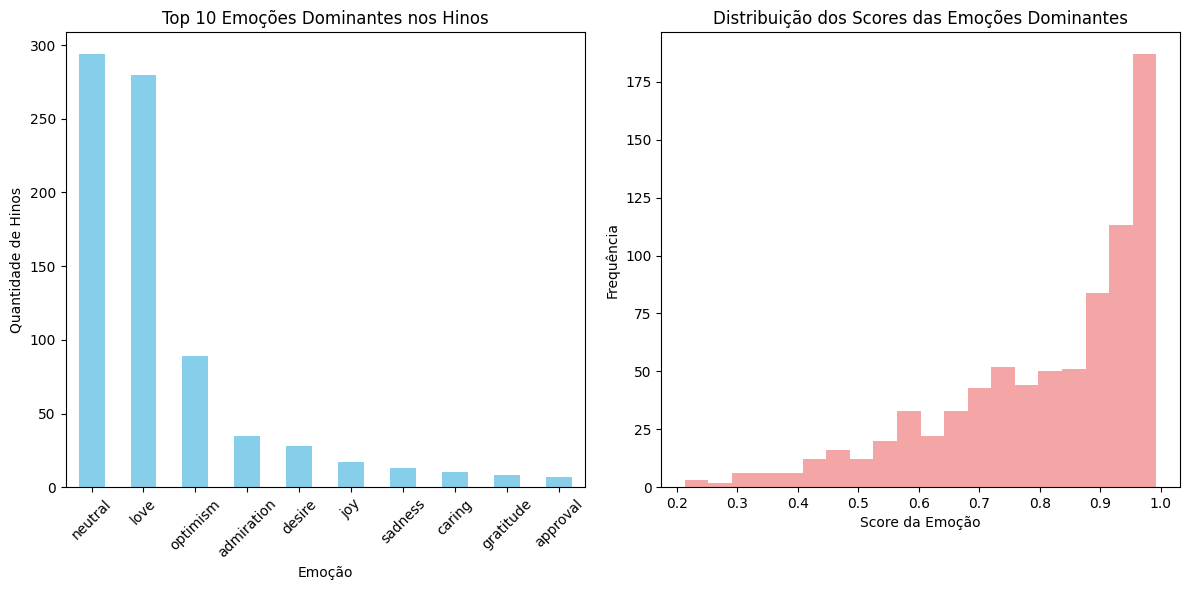


=== ESTATÍSTICAS DAS EMOÇÕES ===
Total de hinos analisados: 795
Hinos com erro no processamento: 0
Score médio das emoções dominantes: 0.809

Top 10 emoções mais frequentes:
 1. neutral        : 294 hinos (37.0%)
 2. love           : 280 hinos (35.2%)
 3. optimism       :  89 hinos (11.2%)
 4. admiration     :  35 hinos ( 4.4%)
 5. desire         :  28 hinos ( 3.5%)
 6. joy            :  17 hinos ( 2.1%)
 7. sadness        :  13 hinos ( 1.6%)
 8. caring         :  10 hinos ( 1.3%)
 9. gratitude      :   8 hinos ( 1.0%)
10. approval       :   7 hinos ( 0.9%)

=== EXEMPLOS POR EMOÇÃO ===

NEUTRAL (score: 0.911):
  Hino: O SANGUE DE JESUS TEM PODER PARA SALVAR
  Texto: O SANGUE DE JESUS TEM PODER O SANGUE DE JESUS, O SANGUE DE JESUS, O SANGUE DE JESUS TEM PODER. O SAN...

LOVE (score: 0.356):
  Hino: O SANGUE DE JESUS TEM PODER
  Texto: O SANGUE DE JESUS TEM PODER, PODER QUE A MIM PODE VALER, SE COMUNHÃO NÃO POSSO EU SENTIR, SENHOR, DE...

OPTIMISM (score: 0.677):
  Hino: AQUILO QUE FUI 

In [20]:
# Análise e visualização dos resultados de emoções
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Verificar se os dados foram processados
if "emocoes" not in hinos_analise.columns:
    print("Execute a célula anterior primeiro para processar as emoções!")
else:
    print("Analisando resultados das emoções...")

    # Extrair a emoção dominante de cada hino
    emocoes_dominantes = []
    scores_dominantes = []

    for emocoes in hinos_analise["emocoes"]:
        if emocoes:
            top_emocao = max(emocoes.items(), key=lambda x: x[1])
            emocoes_dominantes.append(top_emocao[0])
            scores_dominantes.append(top_emocao[1])
        else:
            emocoes_dominantes.append("unknown")
            scores_dominantes.append(0.0)

    hinos_analise["emocao_dominante"] = emocoes_dominantes
    hinos_analise["score_dominante"] = scores_dominantes

    # 1. Distribuição das emoções dominantes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    emocao_counts = pd.Series(emocoes_dominantes).value_counts().head(10)
    emocao_counts.plot(kind="bar", color="skyblue")
    plt.title("Top 10 Emoções Dominantes nos Hinos")
    plt.xlabel("Emoção")
    plt.ylabel("Quantidade de Hinos")
    plt.xticks(rotation=45)

    # 2. Distribuição dos scores das emoções dominantes
    plt.subplot(1, 2, 2)
    plt.hist(scores_dominantes, bins=20, color="lightcoral", alpha=0.7)
    plt.title("Distribuição dos Scores das Emoções Dominantes")
    plt.xlabel("Score da Emoção")
    plt.ylabel("Frequência")

    plt.tight_layout()
    plt.show()

    # 3. Estatísticas das emoções
    print("\n=== ESTATÍSTICAS DAS EMOÇÕES ===")
    print(f"Total de hinos analisados: {len(hinos_analise)}")
    print(f"Hinos com erro no processamento: {emocoes_dominantes.count('unknown')}")
    print(
        f"Score médio das emoções dominantes: {np.mean([s for s in scores_dominantes if s > 0]):.3f}"
    )

    print("\nTop 10 emoções mais frequentes:")
    for i, (emocao, count) in enumerate(emocao_counts.head(10).items(), 1):
        percentage = (count / len(hinos_analise)) * 100
        print(f"{i:2d}. {emocao:15s}: {count:3d} hinos ({percentage:4.1f}%)")

    # 4. Exemplos de hinos por emoção dominante
    print("\n=== EXEMPLOS POR EMOÇÃO ===")
    for emocao in emocao_counts.head(5).index:
        hinos_emocao = hinos_analise[hinos_analise["emocao_dominante"] == emocao]
        exemplo = hinos_emocao.iloc[0]
        print(f"\n{emocao.upper()} (score: {exemplo['score_dominante']:.3f}):")
        print(f"  Hino: {exemplo['nome']}")
        print(f"  Texto: {exemplo['texto_limpo'][:100]}...")

    print(f"\nProcessamento concluído! Dados salvos com análise de emoções.")

Analisando resultados das emoções...


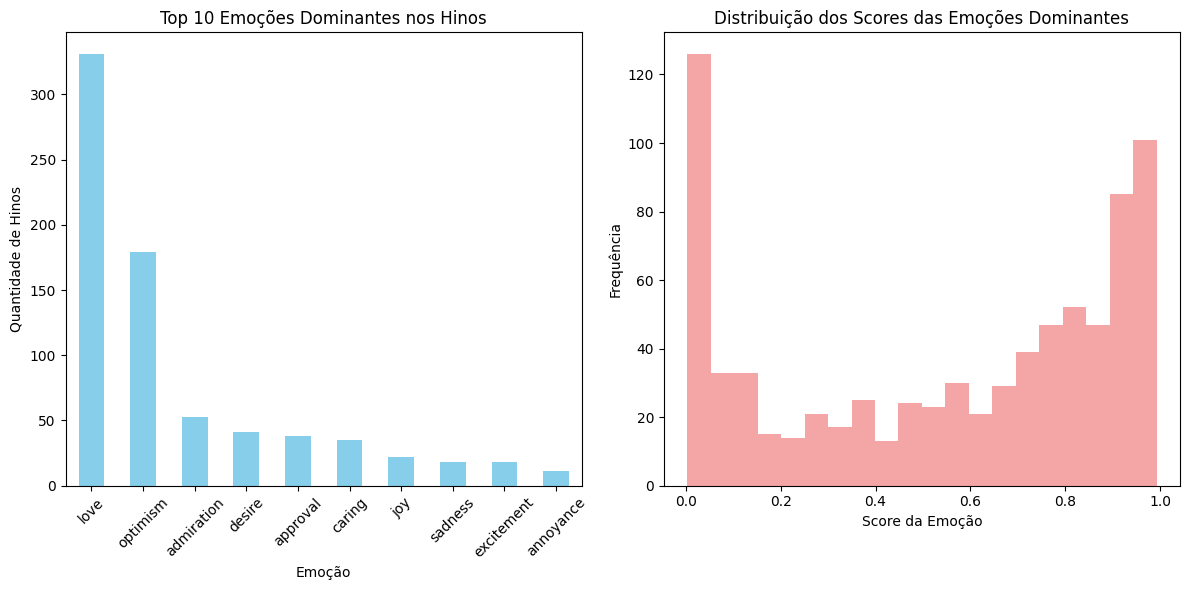


=== ESTATÍSTICAS DAS EMOÇÕES ===
Total de hinos analisados: 795
Hinos com erro no processamento: 0
Score médio das emoções dominantes: 0.551

Top 10 emoções mais frequentes:
 1. love           : 331 hinos (41.6%)
 2. optimism       : 179 hinos (22.5%)
 3. admiration     :  53 hinos ( 6.7%)
 4. desire         :  41 hinos ( 5.2%)
 5. approval       :  38 hinos ( 4.8%)
 6. caring         :  35 hinos ( 4.4%)
 7. joy            :  22 hinos ( 2.8%)
 8. sadness        :  18 hinos ( 2.3%)
 9. excitement     :  18 hinos ( 2.3%)
10. annoyance      :  11 hinos ( 1.4%)

=== EXEMPLOS POR EMOÇÃO ===

LOVE (score: 0.356):
  Hino: O SANGUE DE JESUS TEM PODER
  Texto: O SANGUE DE JESUS TEM PODER, PODER QUE A MIM PODE VALER, SE COMUNHÃO NÃO POSSO EU SENTIR, SENHOR, DE...

OPTIMISM (score: 0.677):
  Hino: AQUILO QUE FUI NÃO SOU MAIS
  Texto: AQUILO QUE FUI NÃO SOU MAIS, NEM SOU TUDO O QUE DEVO SER; JÁ SOU PELA GRAÇA O QUE SOU E AO VÊ-LO EST...

ADMIRATION (score: 0.030):
  Hino: SENHOR, A TI CLAMO
  Tex

In [21]:
# Análise e visualização dos resultados de emoções
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Verificar se os dados foram processados
if "emocoes" not in hinos_analise.columns:
    print("Execute a célula anterior primeiro para processar as emoções!")
else:
    print("Analisando resultados das emoções...")

    # Extrair a emoção dominante de cada hino
    emocoes_dominantes_sem_neutral = []
    scores_dominantes_sem_neutral = []

    for emocoes in hinos_analise["emocoes"]:
        if emocoes:
            # Remove 'neutral' se existir
            emocoes_filtrado = {k: v for k, v in emocoes.items() if k != "neutral"}
            if emocoes_filtrado:
                top_emocao = max(emocoes_filtrado.items(), key=lambda x: x[1])
                emocoes_dominantes_sem_neutral.append(top_emocao[0])
                scores_dominantes_sem_neutral.append(top_emocao[1])
            else:
                emocoes_dominantes_sem_neutral.append("unknown")
                scores_dominantes_sem_neutral.append(0.0)
        else:
            emocoes_dominantes_sem_neutral.append("unknown")
            scores_dominantes_sem_neutral.append(0.0)

    hinos_analise["emocao_dominante_sem_neutral"] = emocoes_dominantes_sem_neutral
    hinos_analise["score_dominante_sem_neutral"] = scores_dominantes_sem_neutral

    # 1. Distribuição das emoções dominantes
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    emocao_counts = pd.Series(emocoes_dominantes_sem_neutral).value_counts().head(10)
    emocao_counts.plot(kind="bar", color="skyblue")
    plt.title("Top 10 Emoções Dominantes nos Hinos")
    plt.xlabel("Emoção")
    plt.ylabel("Quantidade de Hinos")
    plt.xticks(rotation=45)

    # 2. Distribuição dos scores das emoções dominantes
    plt.subplot(1, 2, 2)
    plt.hist(scores_dominantes_sem_neutral, bins=20, color="lightcoral", alpha=0.7)
    plt.title("Distribuição dos Scores das Emoções Dominantes")
    plt.xlabel("Score da Emoção")
    plt.ylabel("Frequência")

    plt.tight_layout()
    plt.show()

    # 3. Estatísticas das emoções
    print("\n=== ESTATÍSTICAS DAS EMOÇÕES ===")
    print(f"Total de hinos analisados: {len(hinos_analise)}")
    print(f"Hinos com erro no processamento: {emocoes_dominantes_sem_neutral.count('unknown')}")
    print(
        f"Score médio das emoções dominantes: {np.mean([s for s in scores_dominantes_sem_neutral if s > 0]):.3f}"
    )

    print("\nTop 10 emoções mais frequentes:")
    for i, (emocao, count) in enumerate(emocao_counts.head(10).items(), 1):
        percentage = (count / len(hinos_analise)) * 100
        print(f"{i:2d}. {emocao:15s}: {count:3d} hinos ({percentage:4.1f}%)")

    # 4. Exemplos de hinos por emoção dominante
    print("\n=== EXEMPLOS POR EMOÇÃO ===")
    for emocao in emocao_counts.head(5).index:
        hinos_emocao = hinos_analise[hinos_analise["emocao_dominante_sem_neutral"] == emocao]
        exemplo = hinos_emocao.iloc[0]
        print(f"\n{emocao.upper()} (score: {exemplo['score_dominante_sem_neutral']:.3f}):")
        print(f"  Hino: {exemplo['nome']}")
        print(f"  Texto: {exemplo['texto_limpo'][:100]}...")

    print(f"\nProcessamento concluído! Dados salvos com análise de emoções.")

---

**A seguir:** Análises comparativas melhoradas - scores emocionais líquidos, agrupamento de emoções e métricas compostas.

VISUALIZAÇÕES AVANÇADAS - GRÁFICOS DE RADAR/SPIDER

1. Perfil Emocional MÉDIO de Todos os Hinos
--------------------------------------------------------------------------------


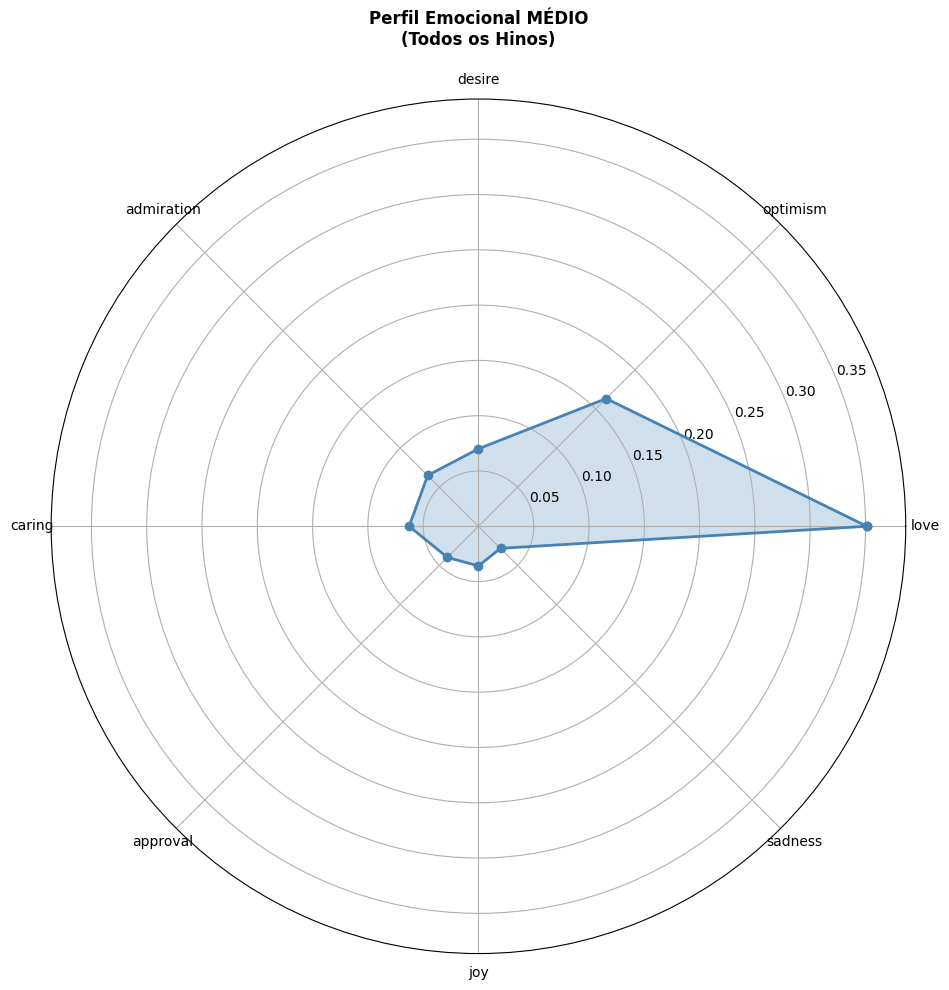


2. Perfis Emocionais por Categoria Dominante
--------------------------------------------------------------------------------
Criando colunas de scores por categoria...
Colunas de categorias criadas!
Criando coluna score_liquido...
Coluna score_liquido criada!


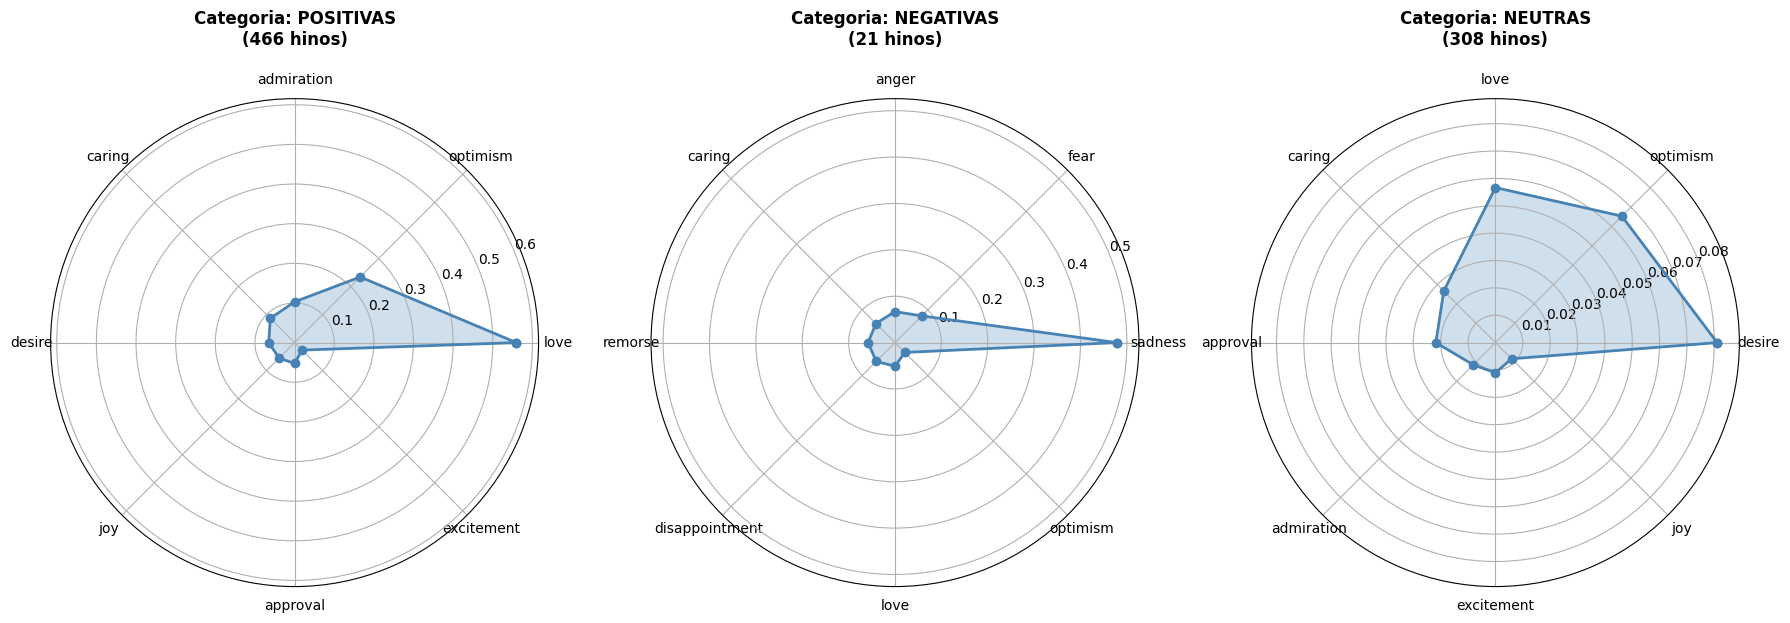


3. Perfis Emocionais de Hinos Específicos
--------------------------------------------------------------------------------


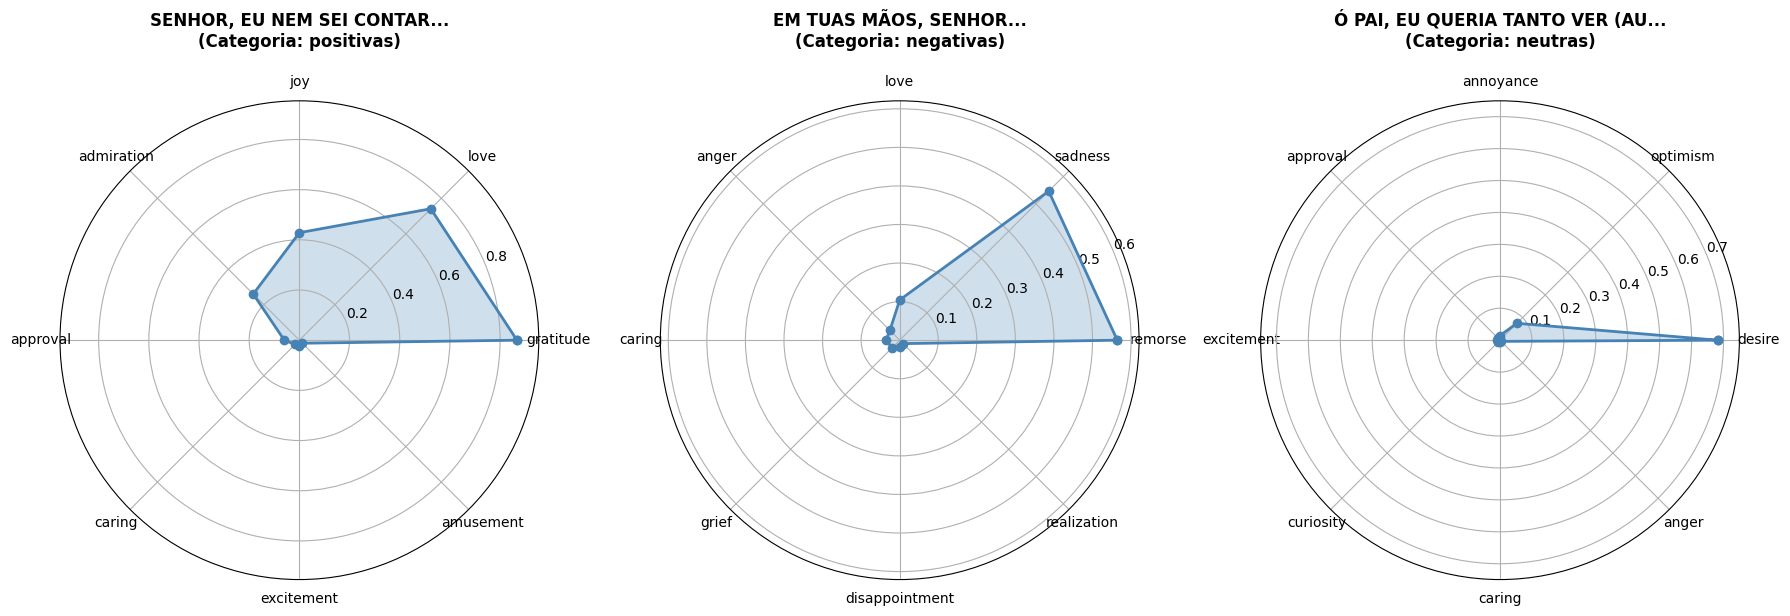


1. SENHOR, EU NEM SEI CONTAR
   Categoria: positivas
   Score líquido: 0.864

2. EM TUAS MÃOS, SENHOR
   Categoria: negativas
   Score líquido: 0.552

3. Ó PAI, EU QUERIA TANTO VER (AUTOR DA MINHA FÉ)
   Categoria: neutras
   Score líquido: 0.101

GRÁFICOS DE RADAR CONCLUÍDOS!


In [22]:
# ===== VISUALIZAÇÕES AVANÇADAS: GRÁFICOS DE RADAR =====

print("="*80)
print("VISUALIZAÇÕES AVANÇADAS - GRÁFICOS DE RADAR/SPIDER")
print("="*80)

import matplotlib.pyplot as plt
import numpy as np

def criar_radar_chart(emocoes_dict, titulo, ax=None):
    """Cria um gráfico de radar para visualizar perfil emocional"""
    
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Pegar todas as emoções (exceto neutral para focar nas principais)
    emocoes_filtradas = {k: v for k, v in emocoes_dict.items() if k != 'neutral'}
    
    # Pegar top 8 emoções para não poluir o gráfico
    top_emocoes = sorted(emocoes_filtradas.items(), key=lambda x: x[1], reverse=True)[:8]
    
    if not top_emocoes:
        return ax
    
    labels = [e[0] for e in top_emocoes]
    values = [e[1] for e in top_emocoes]
    
    # Número de variáveis
    num_vars = len(labels)
    
    # Calcular ângulos
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    
    # Fechar o círculo
    values += values[:1]
    angles += angles[:1]
    labels += labels[:1]
    
    # Plot
    ax.plot(angles, values, 'o-', linewidth=2, color='steelblue')
    ax.fill(angles, values, alpha=0.25, color='steelblue')
    
    # Labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels[:-1])
    ax.set_ylim(0, max(values) * 1.1)
    ax.set_title(titulo, pad=20, fontsize=12, fontweight='bold')
    ax.grid(True)
    
    return ax

# 1. Radar do perfil emocional médio geral
print("\n1. Perfil Emocional MÉDIO de Todos os Hinos")
print("-" * 80)

# Calcular média de cada emoção
emocoes_medias = {}
for emocoes in hinos_analise["emocoes"]:
    if emocoes:
        for emocao, score in emocoes.items():
            if emocao not in emocoes_medias:
                emocoes_medias[emocao] = []
            emocoes_medias[emocao].append(score)

emocoes_medias_final = {k: np.mean(v) for k, v in emocoes_medias.items()}

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
criar_radar_chart(emocoes_medias_final, "Perfil Emocional MÉDIO\n(Todos os Hinos)", ax)
plt.tight_layout()
plt.show()


# 2. Radares comparando categorias emocionais
print("\n2. Perfis Emocionais por Categoria Dominante")
print("-" * 80)

# Verificar se as colunas necessárias existem, se não, criar
if 'score_positivas' not in hinos_analise.columns:
    print("Criando colunas de scores por categoria...")
    
    # Definir categorias (ajustar conforme as emoções do modelo)
    CATEGORIAS_EMOCOES = {
        'positivas': ['joy', 'love', 'admiration', 'approval', 'caring', 'excitement', 'gratitude', 'optimism', 'pride', 'relief'],
        'negativas': ['anger', 'disgust', 'fear', 'sadness', 'disappointment', 'embarrassment', 'grief', 'nervousness', 'remorse'],
        'neutras': ['neutral', 'realization', 'surprise', 'confusion', 'curiosity', 'desire', 'amusement']
    }
    
    def calcular_score_categoria(emocoes, categoria):
        """Soma os scores de todas as emoções de uma categoria"""
        if not emocoes:
            return 0.0
        emocoes_da_categoria = CATEGORIAS_EMOCOES.get(categoria, [])
        return sum(emocoes.get(emocao, 0.0) for emocao in emocoes_da_categoria)
    
    # Aplicar para cada categoria
    for categoria in ['positivas', 'negativas', 'neutras']:
        hinos_analise[f'score_{categoria}'] = hinos_analise['emocoes'].apply(
            lambda x: calcular_score_categoria(x, categoria)
        )
    
    # Categoria dominante
    def categoria_dominante_func(row):
        scores = {
            'positivas': row['score_positivas'],
            'negativas': row['score_negativas'],
            'neutras': row['score_neutras']
        }
        return max(scores.items(), key=lambda x: x[1])[0]
    
    hinos_analise['categoria_dominante'] = hinos_analise.apply(categoria_dominante_func, axis=1)
    print("Colunas de categorias criadas!")

# Verificar se score_liquido existe
if 'score_liquido' not in hinos_analise.columns:
    print("Criando coluna score_liquido...")
    
    def calcular_score_liquido(emocoes):
        """Calcula a diferença entre emoção dominante (não-neutral) e neutral"""
        if not emocoes:
            return 0.0, "unknown"
        
        score_neutral = emocoes.get("neutral", 0.0)
        emocoes_sem_neutral = {k: v for k, v in emocoes.items() if k != "neutral"}
        
        if emocoes_sem_neutral:
            top_emocao, top_score = max(emocoes_sem_neutral.items(), key=lambda x: x[1])
            return top_score - score_neutral, top_emocao
        return 0.0, "unknown"
    
    scores_liquidos = hinos_analise["emocoes"].apply(calcular_score_liquido)
    hinos_analise["score_liquido"] = scores_liquidos.apply(lambda x: x[0])
    hinos_analise["emocao_dominante_nao_neutral"] = scores_liquidos.apply(lambda x: x[1])
    print("Coluna score_liquido criada!")

fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))

for i, categoria in enumerate(['positivas', 'negativas', 'neutras']):
    hinos_categoria = hinos_analise[hinos_analise['categoria_dominante'] == categoria]
    
    if len(hinos_categoria) > 0:
        # Calcular perfil médio da categoria
        emocoes_cat = {}
        for emocoes in hinos_categoria["emocoes"]:
            if emocoes:
                for emocao, score in emocoes.items():
                    if emocao not in emocoes_cat:
                        emocoes_cat[emocao] = []
                    emocoes_cat[emocao].append(score)
        
        emocoes_cat_media = {k: np.mean(v) for k, v in emocoes_cat.items()}
        
        criar_radar_chart(
            emocoes_cat_media, 
            f"Categoria: {categoria.upper()}\n({len(hinos_categoria)} hinos)",
            axes[i]
        )

plt.tight_layout()
plt.show()


# 3. Radares de hinos individuais específicos
print("\n3. Perfis Emocionais de Hinos Específicos")
print("-" * 80)

# Pegar exemplos interessantes: um de cada categoria
exemplos = []
for categoria in ['positivas', 'negativas', 'neutras']:
    hinos_cat = hinos_analise[hinos_analise['categoria_dominante'] == categoria]
    if len(hinos_cat) > 0:
        # Pegar o mais representativo (maior score da categoria)
        mais_representativo = hinos_cat.nlargest(1, f'score_{categoria}').iloc[0]
        exemplos.append(mais_representativo)

if len(exemplos) >= 3:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), subplot_kw=dict(projection='polar'))
    
    for i, hino in enumerate(exemplos):
        if hino['emocoes']:
            criar_radar_chart(
                hino['emocoes'],
                f"{hino['nome'][:30]}...\n(Categoria: {hino['categoria_dominante']})",
                axes[i]
            )
    
    plt.tight_layout()
    plt.show()
    
    for i, hino in enumerate(exemplos, 1):
        print(f"\n{i}. {hino['nome']}")
        print(f"   Categoria: {hino['categoria_dominante']}")
        print(f"   Score líquido: {hino['score_liquido']:.3f}")

print("\n" + "="*80)
print("GRÁFICOS DE RADAR CONCLUÍDOS!")
print("="*80)

ANÁLISES CONTEXTUAIS - RELAÇÃO COM OUTRAS VARIÁVEIS
Criando coluna valencia_emocional...
Coluna valencia_emocional criada!
Criando coluna diversidade_emocional...
Coluna diversidade_emocional criada!

1. Relação entre Emoções e Extensão do Texto
--------------------------------------------------------------------------------
Caracteres médio: 532
Palavras médio: 99

--- Distribuição de Categorias Emocionais por Tamanho do Texto ---
categoria_dominante  negativas  neutras  positivas
tamanho_texto                                     
Curto                     4.89    44.74      50.38
Médio                     1.48    30.37      68.15
Longo                     1.54    41.31      57.14
Coluna diversidade_emocional criada!

1. Relação entre Emoções e Extensão do Texto
--------------------------------------------------------------------------------
Caracteres médio: 532
Palavras médio: 99

--- Distribuição de Categorias Emocionais por Tamanho do Texto ---
categoria_dominante  negativas  neut

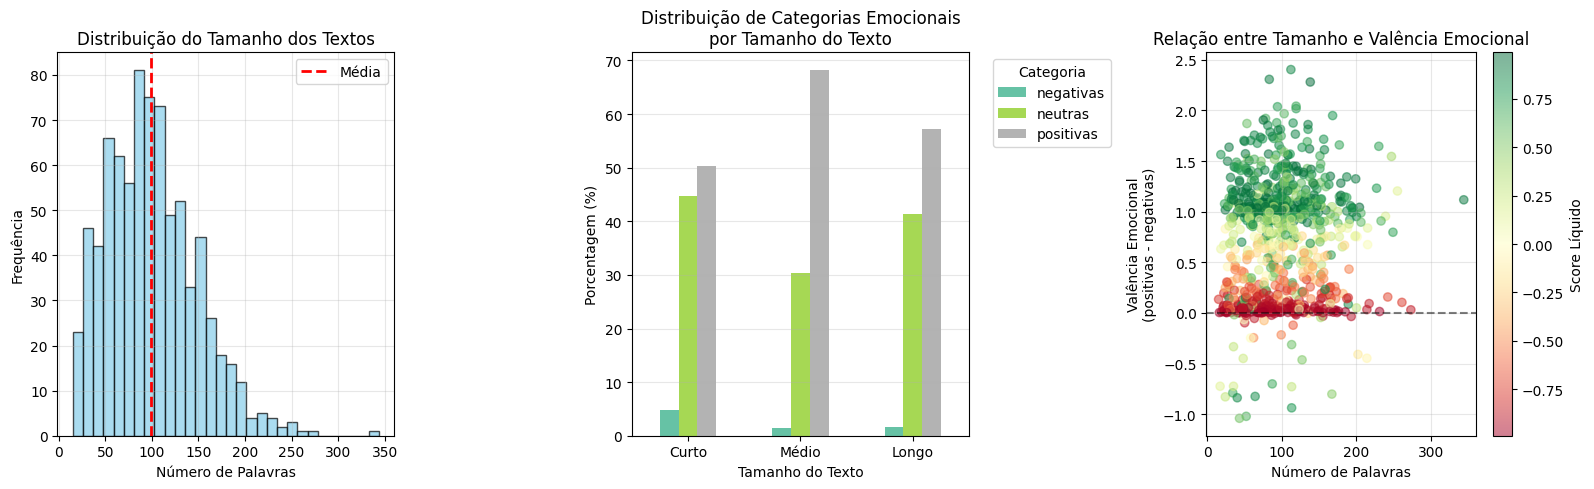


--- Correlação entre Tamanho do Texto e Métricas Emocionais ---
num_palavras             1.000000
valencia_emocional       0.074109
score_liquido            0.039703
diversidade_emocional    0.031581
Name: num_palavras, dtype: float64


2. Relação entre Emoções e Complexidade Léxica
--------------------------------------------------------------------------------
Complexidade léxica média: 0.572
(Valores próximos de 1 = muito variado, próximos de 0 = repetitivo)

--- Complexidade Léxica por Categoria Emocional ---
                         mean       std  count
categoria_dominante                           
negativas            0.647072  0.151467     21
neutras              0.565302  0.155570    308
positivas            0.572502  0.155105    466


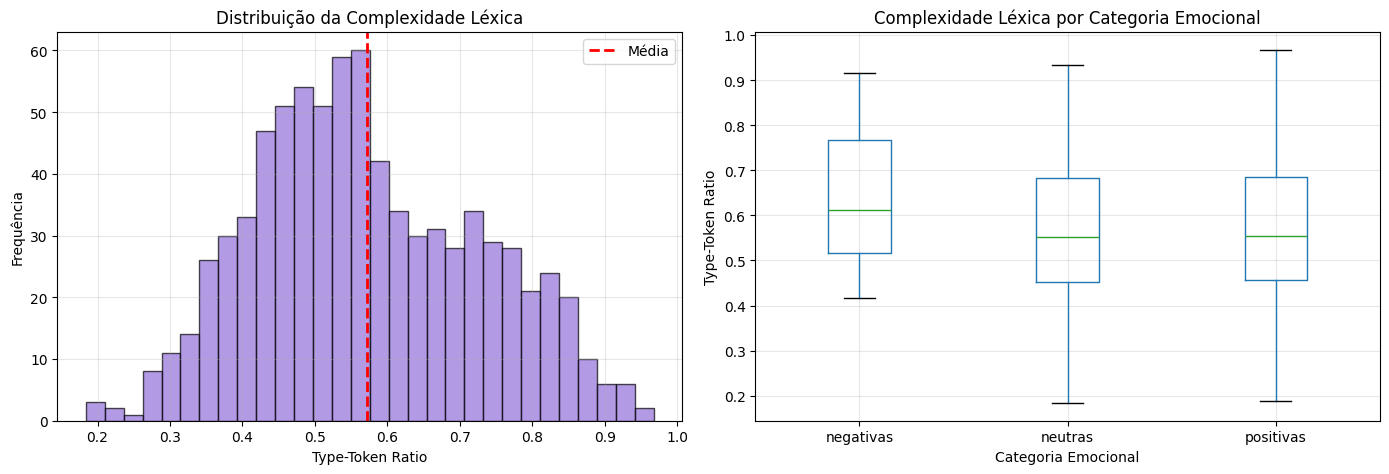


--- Correlação entre Complexidade Léxica e Métricas Emocionais ---
complexidade_lexica      1.000000
diversidade_emocional    0.130456
score_liquido            0.066833
valencia_emocional       0.017948
Name: complexidade_lexica, dtype: float64

ANÁLISES CONTEXTUAIS CONCLUÍDAS!


In [23]:
# ===== ANÁLISES CONTEXTUAIS: RELAÇÃO COM OUTRAS VARIÁVEIS =====

print("="*80)
print("ANÁLISES CONTEXTUAIS - RELAÇÃO COM OUTRAS VARIÁVEIS")
print("="*80)

# Verificar se as colunas necessárias existem
if 'valencia_emocional' not in hinos_analise.columns:
    print("Criando coluna valencia_emocional...")
    # Precisa ter score_positivas e score_negativas primeiro
    if 'score_positivas' not in hinos_analise.columns:
        CATEGORIAS_EMOCOES = {
            'positivas': ['joy', 'love', 'admiration', 'approval', 'caring', 'excitement', 'gratitude', 'optimism', 'pride', 'relief'],
            'negativas': ['anger', 'disgust', 'fear', 'sadness', 'disappointment', 'embarrassment', 'grief', 'nervousness', 'remorse'],
            'neutras': ['neutral', 'realization', 'surprise', 'confusion', 'curiosity', 'desire', 'amusement']
        }
        
        def calcular_score_categoria(emocoes, categoria):
            if not emocoes:
                return 0.0
            emocoes_da_categoria = CATEGORIAS_EMOCOES.get(categoria, [])
            return sum(emocoes.get(emocao, 0.0) for emocao in emocoes_da_categoria)
        
        for categoria in ['positivas', 'negativas', 'neutras']:
            hinos_analise[f'score_{categoria}'] = hinos_analise['emocoes'].apply(
                lambda x: calcular_score_categoria(x, categoria)
            )
    
    hinos_analise['valencia_emocional'] = hinos_analise['score_positivas'] - hinos_analise['score_negativas']
    print("Coluna valencia_emocional criada!")

if 'score_liquido' not in hinos_analise.columns:
    print("Criando coluna score_liquido...")
    def calcular_score_liquido(emocoes):
        if not emocoes:
            return 0.0, "unknown"
        score_neutral = emocoes.get("neutral", 0.0)
        emocoes_sem_neutral = {k: v for k, v in emocoes.items() if k != "neutral"}
        if emocoes_sem_neutral:
            top_emocao, top_score = max(emocoes_sem_neutral.items(), key=lambda x: x[1])
            return top_score - score_neutral, top_emocao
        return 0.0, "unknown"
    
    scores_liquidos = hinos_analise["emocoes"].apply(calcular_score_liquido)
    hinos_analise["score_liquido"] = scores_liquidos.apply(lambda x: x[0])
    print("Coluna score_liquido criada!")

if 'categoria_dominante' not in hinos_analise.columns:
    print("Criando coluna categoria_dominante...")
    def categoria_dominante_func(row):
        scores = {
            'positivas': row['score_positivas'],
            'negativas': row['score_negativas'],
            'neutras': row['score_neutras']
        }
        return max(scores.items(), key=lambda x: x[1])[0]
    
    hinos_analise['categoria_dominante'] = hinos_analise.apply(categoria_dominante_func, axis=1)
    print("Coluna categoria_dominante criada!")

if 'diversidade_emocional' not in hinos_analise.columns:
    print("Criando coluna diversidade_emocional...")
    from scipy.stats import entropy
    
    def calcular_diversidade_emocional(emocoes):
        """Calcula a entropia de Shannon para medir diversidade emocional"""
        if not emocoes:
            return 0.0
        scores = np.array(list(emocoes.values()))
        # Normalizar para que somem 1 (distribuição de probabilidade)
        if scores.sum() > 0:
            probs = scores / scores.sum()
            return entropy(probs)
        return 0.0
    
    hinos_analise["diversidade_emocional"] = hinos_analise["emocoes"].apply(calcular_diversidade_emocional)
    print("Coluna diversidade_emocional criada!")

# 1. RELAÇÃO ENTRE EMOÇÕES E EXTENSÃO DO TEXTO
print("\n1. Relação entre Emoções e Extensão do Texto")
print("-" * 80)

# Calcular extensão do texto
if 'texto_limpo' in hinos_analise.columns:
    hinos_analise['num_caracteres'] = hinos_analise['texto_limpo'].astype(str).str.len()
    hinos_analise['num_palavras'] = hinos_analise['texto_limpo'].astype(str).str.split().str.len()
    
    print(f"Caracteres médio: {hinos_analise['num_caracteres'].mean():.0f}")
    print(f"Palavras médio: {hinos_analise['num_palavras'].mean():.0f}")
    
    # Criar bins de tamanho
    hinos_analise['tamanho_texto'] = pd.qcut(
        hinos_analise['num_palavras'], 
        q=3, 
        labels=['Curto', 'Médio', 'Longo'],
        duplicates='drop'
    )
    
    # Análise por tamanho
    print("\n--- Distribuição de Categorias Emocionais por Tamanho do Texto ---")
    crosstab_tamanho = pd.crosstab(
        hinos_analise['tamanho_texto'],
        hinos_analise['categoria_dominante'],
        normalize='index'
    ) * 100
    print(crosstab_tamanho.round(2))
    
    # Visualização
    fig, axes = plt.subplots(1, 3, figsize=(16, 5))
    
    # 1. Distribuição de tamanhos
    axes[0].hist(hinos_analise['num_palavras'], bins=30, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0].axvline(hinos_analise['num_palavras'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
    axes[0].set_title("Distribuição do Tamanho dos Textos")
    axes[0].set_xlabel("Número de Palavras")
    axes[0].set_ylabel("Frequência")
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    # 2. Emoções por tamanho
    crosstab_tamanho.plot(kind='bar', ax=axes[1], stacked=False, colormap='Set2')
    axes[1].set_title("Distribuição de Categorias Emocionais\npor Tamanho do Texto")
    axes[1].set_xlabel("Tamanho do Texto")
    axes[1].set_ylabel("Porcentagem (%)")
    axes[1].legend(title="Categoria", bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
    axes[1].grid(axis='y', alpha=0.3)
    
    # 3. Scatter: tamanho vs valencia emocional
    axes[2].scatter(
        hinos_analise['num_palavras'],
        hinos_analise['valencia_emocional'],
        alpha=0.5,
        c=hinos_analise['score_liquido'],
        cmap='RdYlGn'
    )
    axes[2].axhline(0, color='black', linestyle='--', alpha=0.5)
    axes[2].set_xlabel("Número de Palavras")
    axes[2].set_ylabel("Valência Emocional\n(positivas - negativas)")
    axes[2].set_title("Relação entre Tamanho e Valência Emocional")
    axes[2].grid(alpha=0.3)
    plt.colorbar(axes[2].collections[0], ax=axes[2], label='Score Líquido')
    
    plt.tight_layout()
    plt.show()
    
    # Correlação
    corr_tamanho_valencia = hinos_analise[['num_palavras', 'valencia_emocional', 'score_liquido', 'diversidade_emocional']].corr()
    print("\n--- Correlação entre Tamanho do Texto e Métricas Emocionais ---")
    print(corr_tamanho_valencia['num_palavras'].sort_values(ascending=False))
    
else:
    print("COLUNA 'texto_limpo' NÃO ENCONTRADA - pulando análise de extensão")


# 2. RELAÇÃO ENTRE EMOÇÕES E COMPLEXIDADE LÉXICA
print("\n\n2. Relação entre Emoções e Complexidade Léxica")
print("-" * 80)

if 'texto_limpo' in hinos_analise.columns and 'num_palavras' in hinos_analise.columns:
    # Calcular vocabulário único (type-token ratio)
    def calcular_complexidade(texto):
        if pd.isna(texto) or not texto:
            return 0.0
        palavras = str(texto).lower().split()
        if len(palavras) == 0:
            return 0.0
        palavras_unicas = set(palavras)
        return len(palavras_unicas) / len(palavras)  # Type-token ratio
    
    hinos_analise['complexidade_lexica'] = hinos_analise['texto_limpo'].apply(calcular_complexidade)
    
    print(f"Complexidade léxica média: {hinos_analise['complexidade_lexica'].mean():.3f}")
    print("(Valores próximos de 1 = muito variado, próximos de 0 = repetitivo)")
    
    # Análise por categoria emocional
    print("\n--- Complexidade Léxica por Categoria Emocional ---")
    complexidade_por_cat = hinos_analise.groupby('categoria_dominante')['complexidade_lexica'].agg(['mean', 'std', 'count'])
    print(complexidade_por_cat)
    
    # Visualização
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    axes[0].hist(hinos_analise['complexidade_lexica'], bins=30, color='mediumpurple', alpha=0.7, edgecolor='black')
    axes[0].axvline(hinos_analise['complexidade_lexica'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
    axes[0].set_title("Distribuição da Complexidade Léxica")
    axes[0].set_xlabel("Type-Token Ratio")
    axes[0].set_ylabel("Frequência")
    axes[0].legend()
    axes[0].grid(alpha=0.3)
    
    hinos_analise.boxplot(column='complexidade_lexica', by='categoria_dominante', ax=axes[1])
    axes[1].set_title("Complexidade Léxica por Categoria Emocional")
    axes[1].set_xlabel("Categoria Emocional")
    axes[1].set_ylabel("Type-Token Ratio")
    axes[1].get_figure().suptitle('')  # Remover título automático
    axes[1].grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Correlação
    print("\n--- Correlação entre Complexidade Léxica e Métricas Emocionais ---")
    corr_complex = hinos_analise[['complexidade_lexica', 'valencia_emocional', 'score_liquido', 'diversidade_emocional']].corr()
    print(corr_complex['complexidade_lexica'].sort_values(ascending=False))
    
else:
    print("DADOS INSUFICIENTES - pulando análise de complexidade léxica")

print("\n" + "="*80)
print("ANÁLISES CONTEXTUAIS CONCLUÍDAS!")
print("="*80)

1. ANÁLISE DE DISTRIBUIÇÃO CONJUNTA DE EMOÇÕES

--- Correlação entre Emoções ---


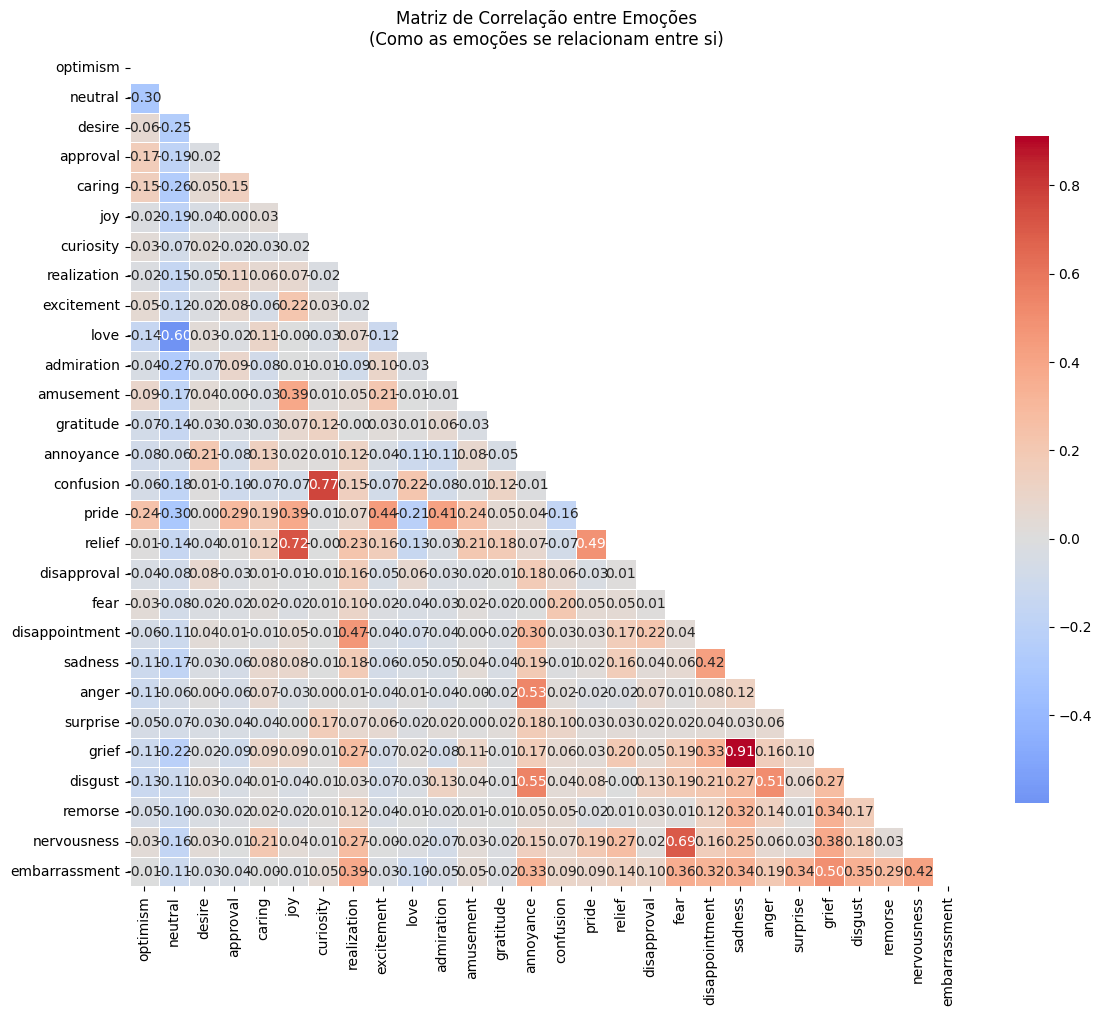


Pares de emoções MAIS correlacionadas (positivamente):
 1. sadness      ↔ grief       : 0.911
 2. grief        ↔ sadness     : 0.911
 3. confusion    ↔ curiosity   : 0.767
 4. curiosity    ↔ confusion   : 0.767
 5. joy          ↔ relief      : 0.718
 6. relief       ↔ joy         : 0.718
 7. fear         ↔ nervousness : 0.694
 8. nervousness  ↔ fear        : 0.694
 9. annoyance    ↔ disgust     : 0.546
10. disgust      ↔ annoyance   : 0.546

Pares de emoções MENOS correlacionadas (negativamente):
 1. neutral      ↔ caring      : -0.262
 2. caring       ↔ neutral     : -0.262
 3. neutral      ↔ admiration  : -0.268
 4. admiration   ↔ neutral     : -0.268
 5. neutral      ↔ pride       : -0.297
 6. pride        ↔ neutral     : -0.297
 7. optimism     ↔ neutral     : -0.299
 8. neutral      ↔ optimism    : -0.299
 9. love         ↔ neutral     : -0.599
10. neutral      ↔ love        : -0.599

2. ANÁLISE DE DIVERSIDADE EMOCIONAL

--- Estatísticas de Diversidade Emocional ---
Entropia médi

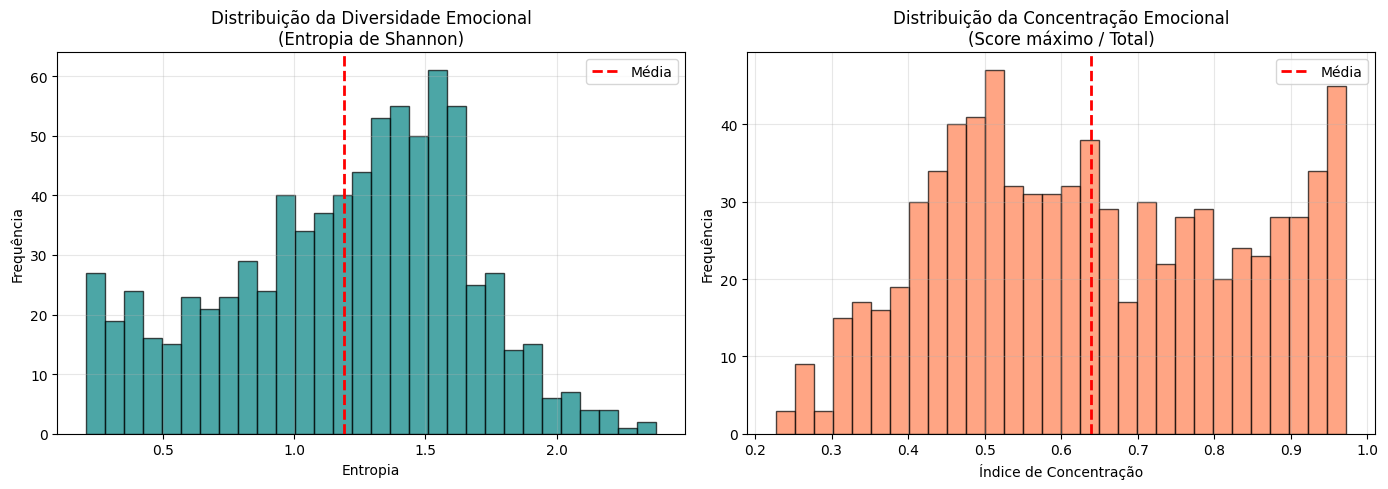


--- Hinos Mais DIVERSOS Emocionalmente (múltiplas emoções balanceadas) ---

1. PERDIDO FOI QUE ELE ME ENCONTROU
   Entropia: 2.380
   Top 3 emoções: optimism(0.35), caring(0.23), fear(0.15)

2. JÁ NÃO ESTOU SOZINHO
   Entropia: 2.315
   Top 3 emoções: optimism(0.47), sadness(0.40), joy(0.27)

3. EIS O ESTANDARTE
   Entropia: 2.264
   Top 3 emoções: neutral(0.31), sadness(0.25), fear(0.06)

4. HÁ UM AMIGO SEMPRE JUNTO
   Entropia: 2.230
   Top 3 emoções: disappointment(0.23), neutral(0.21), sadness(0.14)

5. O SANGUE DE JESUS TEM PODER
   Entropia: 2.213
   Top 3 emoções: love(0.36), sadness(0.17), desire(0.14)

--- Hinos Mais CONCENTRADOS Emocionalmente (emoção dominante forte) ---

1. PÕE TEU SANGUE SOBRE MIM
   Concentração: 0.972
   Emoção dominante: neutral (0.992)

2. INVOCA-ME E TE RESPONDEREI
   Concentração: 0.971
   Emoção dominante: neutral (0.992)

3. COMO AS ÁGUAS
   Concentração: 0.970
   Emoção dominante: neutral (0.991)

4. SOMENTE PELA FÉ A OBRA DE DEUS
   Concentração

In [25]:
# ===== ANÁLISES ESTATÍSTICAS PROFUNDAS =====

# 1. ANÁLISE DE DISTRIBUIÇÃO CONJUNTA DE EMOÇÕES
print("="*80)
print("1. ANÁLISE DE DISTRIBUIÇÃO CONJUNTA DE EMOÇÕES")
print("="*80)

# Criar dataframe com todas as emoções expandidas
emocoes_por_hino = []
for emocoes in hinos_analise["emocoes"]:
    if emocoes:
        emocoes_por_hino.append(emocoes)
    else:
        emocoes_por_hino.append({})

emo_df_completo = pd.DataFrame(emocoes_por_hino).fillna(0)

# Matriz de correlação entre emoções
print("\n--- Correlação entre Emoções ---")
correlacao_emocoes = emo_df_completo.corr()

# Visualizar matriz de correlação
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlacao_emocoes, dtype=bool))
sns.heatmap(
    correlacao_emocoes,
    mask=mask,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Matriz de Correlação entre Emoções\n(Como as emoções se relacionam entre si)")
plt.tight_layout()
plt.show()

# Identificar pares de emoções mais correlacionadas
print("\nPares de emoções MAIS correlacionadas (positivamente):")
corr_flat = correlacao_emocoes.unstack()
corr_sorted = corr_flat.sort_values(ascending=False)
# Remover auto-correlações (diagonal)
corr_sorted = corr_sorted[corr_sorted < 0.999]
for i, (pair, valor) in enumerate(corr_sorted.head(10).items(), 1):
    print(f"{i:2d}. {pair[0]:12s} ↔ {pair[1]:12s}: {valor:.3f}")

print("\nPares de emoções MENOS correlacionadas (negativamente):")
for i, (pair, valor) in enumerate(corr_sorted.tail(10).items(), 1):
    print(f"{i:2d}. {pair[0]:12s} ↔ {pair[1]:12s}: {valor:.3f}")


# 2. ANÁLISE DE DIVERSIDADE EMOCIONAL
print("\n" + "="*80)
print("2. ANÁLISE DE DIVERSIDADE EMOCIONAL")
print("="*80)

from scipy.stats import entropy

def calcular_diversidade_emocional(emocoes):
    """Calcula a entropia de Shannon para medir diversidade emocional"""
    if not emocoes:
        return 0.0
    scores = np.array(list(emocoes.values()))
    # Normalizar para que somem 1 (distribuição de probabilidade)
    if scores.sum() > 0:
        probs = scores / scores.sum()
        return entropy(probs)
    return 0.0

def calcular_concentracao_emocional(emocoes):
    """Calcula índice de concentração (Gini simplificado)"""
    if not emocoes:
        return 0.0
    scores = np.array(list(emocoes.values()))
    if scores.sum() == 0:
        return 0.0
    # Score máximo / soma total (quanto maior, mais concentrado)
    return scores.max() / scores.sum()

# Aplicar métricas
hinos_analise["diversidade_emocional"] = hinos_analise["emocoes"].apply(calcular_diversidade_emocional)
hinos_analise["concentracao_emocional"] = hinos_analise["emocoes"].apply(calcular_concentracao_emocional)

print("\n--- Estatísticas de Diversidade Emocional ---")
print(f"Entropia média: {hinos_analise['diversidade_emocional'].mean():.3f}")
print(f"Entropia mínima: {hinos_analise['diversidade_emocional'].min():.3f}")
print(f"Entropia máxima: {hinos_analise['diversidade_emocional'].max():.3f}")
print(f"\nConcentração média: {hinos_analise['concentracao_emocional'].mean():.3f}")

# Visualizar distribuição
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(hinos_analise["diversidade_emocional"], bins=30, color="teal", alpha=0.7, edgecolor='black')
axes[0].axvline(hinos_analise["diversidade_emocional"].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[0].set_title("Distribuição da Diversidade Emocional\n(Entropia de Shannon)")
axes[0].set_xlabel("Entropia")
axes[0].set_ylabel("Frequência")
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist(hinos_analise["concentracao_emocional"], bins=30, color="coral", alpha=0.7, edgecolor='black')
axes[1].axvline(hinos_analise["concentracao_emocional"].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[1].set_title("Distribuição da Concentração Emocional\n(Score máximo / Total)")
axes[1].set_xlabel("Índice de Concentração")
axes[1].set_ylabel("Frequência")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Exemplos de hinos mais diversos vs. mais concentrados
print("\n--- Hinos Mais DIVERSOS Emocionalmente (múltiplas emoções balanceadas) ---")
mais_diversos = hinos_analise.nlargest(5, "diversidade_emocional")
for i, row in enumerate(mais_diversos.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Entropia: {hino['diversidade_emocional']:.3f}")
    if hino['emocoes']:
        top_3 = sorted(hino['emocoes'].items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"   Top 3 emoções: {', '.join([f'{e[0]}({e[1]:.2f})' for e in top_3])}")

print("\n--- Hinos Mais CONCENTRADOS Emocionalmente (emoção dominante forte) ---")
mais_concentrados = hinos_analise.nlargest(5, "concentracao_emocional")
for i, row in enumerate(mais_concentrados.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Concentração: {hino['concentracao_emocional']:.3f}")
    if hino['emocoes']:
        top_emocao = max(hino['emocoes'].items(), key=lambda x: x[1])
        print(f"   Emoção dominante: {top_emocao[0]} ({top_emocao[1]:.3f})")


# 3. ANÁLISE TEMPORAL/SEQUENCIAL
print("\n" + "="*80)
print("3. ANÁLISE TEMPORAL/SEQUENCIAL")
print("="*80)

# Verificar se há coluna de número/ordem do hino
if 'numero' in hinos_analise.columns or 'numero_hino' in hinos_analise.columns:
    num_col = 'numero' if 'numero' in hinos_analise.columns else 'numero_hino'
    
    # Criar bins de posição na coletânea
    hinos_analise['posicao_percentil'] = pd.qcut(
        hinos_analise[num_col], 
        q=4, 
        labels=['Início (25%)', 'Meio-Início (50%)', 'Meio-Fim (75%)', 'Fim (100%)']
    )
    
    print("\n--- Distribuição de Emoções por Posição na Coletânea ---")
    
    # Emoção dominante por quartil
    for quartil in ['Início (25%)', 'Meio-Início (50%)', 'Meio-Fim (75%)', 'Fim (100%)']:
        hinos_quartil = hinos_analise[hinos_analise['posicao_percentil'] == quartil]
        emocao_mais_comum = hinos_quartil['emocao_dominante_sem_neutral'].mode()[0] if len(hinos_quartil) > 0 else 'N/A'
        print(f"\n{quartil}:")
        print(f"  Emoção mais comum: {emocao_mais_comum}")
        print(f"  Top 3 emoções:")
        top3 = hinos_quartil['emocao_dominante_sem_neutral'].value_counts().head(3)
        for emocao, count in top3.items():
            print(f"    - {emocao}: {count} hinos")
    
    # Visualização
    plt.figure(figsize=(14, 6))
    
    # Preparar dados para visualização
    posicao_emocao = pd.crosstab(
        hinos_analise['posicao_percentil'],
        hinos_analise['emocao_dominante_sem_neutral'],
        normalize='index'
    ) * 100
    
    # Selecionar top 6 emoções mais comuns
    top_emocoes = hinos_analise['emocao_dominante_sem_neutral'].value_counts().head(6).index
    posicao_emocao_top = posicao_emocao[top_emocoes]
    
    posicao_emocao_top.plot(kind='bar', stacked=False, figsize=(14, 6), colormap='tab10')
    plt.title("Distribuição de Emoções ao Longo da Coletânea\n(% de hinos por emoção em cada quartil)")
    plt.xlabel("Posição na Coletânea")
    plt.ylabel("Porcentagem de Hinos (%)")
    plt.legend(title="Emoção", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
else:
    print("\nCOLUNA DE NÚMERO/ORDEM NÃO ENCONTRADA")
    print("Tentando usar o índice como proxy da ordem...")
    
    # Usar índice como proxy
    hinos_analise['posicao_percentil'] = pd.qcut(
        hinos_analise.index, 
        q=4, 
        labels=['Início (25%)', 'Meio-Início (50%)', 'Meio-Fim (75%)', 'Fim (100%)'],
        duplicates='drop'
    )
    
    print("\n--- Distribuição de Emoções por Posição (baseado no índice) ---")
    for quartil in hinos_analise['posicao_percentil'].cat.categories:
        hinos_quartil = hinos_analise[hinos_analise['posicao_percentil'] == quartil]
        if len(hinos_quartil) > 0:
            print(f"\n{quartil}: {len(hinos_quartil)} hinos")
            top3 = hinos_quartil['emocao_dominante_sem_neutral'].value_counts().head(3)
            for emocao, count in top3.items():
                print(f"  - {emocao}: {count}")

print("\n" + "="*80)
print("ANÁLISES ESTATÍSTICAS PROFUNDAS CONCLUÍDAS!")
print("="*80)

In [26]:
# ===== ANÁLISES DE CASOS EXTREMOS =====

print("="*80)
print("ANÁLISES DE CASOS EXTREMOS")
print("="*80)

# Verificar se as colunas necessárias existem
if 'categoria_dominante' not in hinos_analise.columns:
    print("Criando colunas necessárias...")
    
    # Criar scores por categoria
    if 'score_positivas' not in hinos_analise.columns:
        CATEGORIAS_EMOCOES = {
            'positivas': ['joy', 'love', 'admiration', 'approval', 'caring', 'excitement', 'gratitude', 'optimism', 'pride', 'relief'],
            'negativas': ['anger', 'disgust', 'fear', 'sadness', 'disappointment', 'embarrassment', 'grief', 'nervousness', 'remorse'],
            'neutras': ['neutral', 'realization', 'surprise', 'confusion', 'curiosity', 'desire', 'amusement']
        }
        
        def calcular_score_categoria(emocoes, categoria):
            if not emocoes:
                return 0.0
            emocoes_da_categoria = CATEGORIAS_EMOCOES.get(categoria, [])
            return sum(emocoes.get(emocao, 0.0) for emocao in emocoes_da_categoria)
        
        for categoria in ['positivas', 'negativas', 'neutras']:
            hinos_analise[f'score_{categoria}'] = hinos_analise['emocoes'].apply(
                lambda x: calcular_score_categoria(x, categoria)
            )
    
    # Criar categoria_dominante
    def categoria_dominante_func(row):
        scores = {
            'positivas': row['score_positivas'],
            'negativas': row['score_negativas'],
            'neutras': row['score_neutras']
        }
        return max(scores.items(), key=lambda x: x[1])[0]
    
    hinos_analise['categoria_dominante'] = hinos_analise.apply(categoria_dominante_func, axis=1)
    print("Coluna categoria_dominante criada!")

if 'score_liquido' not in hinos_analise.columns:
    print("Criando coluna score_liquido...")
    
    def calcular_score_liquido(emocoes):
        if not emocoes:
            return 0.0, "unknown"
        score_neutral = emocoes.get("neutral", 0.0)
        emocoes_sem_neutral = {k: v for k, v in emocoes.items() if k != "neutral"}
        if emocoes_sem_neutral:
            top_emocao, top_score = max(emocoes_sem_neutral.items(), key=lambda x: x[1])
            return top_score - score_neutral, top_emocao
        return 0.0, "unknown"
    
    scores_liquidos = hinos_analise["emocoes"].apply(calcular_score_liquido)
    hinos_analise["score_liquido"] = scores_liquidos.apply(lambda x: x[0])
    print("Coluna score_liquido criada!")

# Função auxiliar para mostrar trechos do texto
def mostrar_trecho_hino(texto, max_chars=200):
    """Retorna um trecho do texto do hino"""
    if pd.isna(texto) or not texto:
        return "[Texto não disponível]"
    texto_str = str(texto)
    if len(texto_str) <= max_chars:
        return texto_str
    return texto_str[:max_chars] + "..."

# 1. TOP HINOS POR CADA EMOÇÃO PRINCIPAL
print("\n1. Top Hinos com Maior Score em Cada Emoção")
print("-" * 80)

# Pegar principais emoções (exceto neutral)
emocoes_principais = hinos_analise['emocao_dominante_sem_neutral'].value_counts().head(8).index

for emocao in emocoes_principais:
    print(f"\n{'='*60}")
    print(f"EMOÇÃO: {emocao.upper()}")
    print('='*60)
    
    # Criar coluna temporária com score dessa emoção
    hinos_analise[f'score_{emocao}_temp'] = hinos_analise['emocoes'].apply(
        lambda x: x.get(emocao, 0.0) if x else 0.0
    )
    
    top_hinos = hinos_analise.nlargest(3, f'score_{emocao}_temp')
    
    for i, row in enumerate(top_hinos.iterrows(), 1):
        idx, hino = row
        print(f"\n{i}. {hino['nome']}")
        print(f"   Score {emocao}: {hino[f'score_{emocao}_temp']:.3f}")
        print(f"   Categoria: {hino['categoria_dominante']} | Score líquido: {hino['score_liquido']:.3f}")
        
        if 'texto_completo' in hinos_analise.columns:
            print(f"   Trecho: {mostrar_trecho_hino(hino['texto_completo'], 150)}")
    
    # Limpar coluna temporária
    hinos_analise.drop(columns=[f'score_{emocao}_temp'], inplace=True)


# 2. HINOS COM PERFIS EMOCIONAIS MAIS ÚNICOS/ATÍPICOS
print("\n\n2. Hinos com Perfis Emocionais Mais Únicos")
print("-" * 80)

# Calcular distância do perfil emocional médio
from scipy.spatial.distance import euclidean

# Criar vetor de emoções médias
emocoes_todas = set()
for emocoes in hinos_analise["emocoes"]:
    if emocoes:
        emocoes_todas.update(emocoes.keys())

vetor_medio = {}
for emocao in emocoes_todas:
    scores = [e.get(emocao, 0.0) for e in hinos_analise["emocoes"] if e]
    vetor_medio[emocao] = np.mean(scores) if scores else 0.0

# Calcular distância euclidiana de cada hino para a média
def calcular_distancia_media(emocoes):
    if not emocoes:
        return 0.0
    vetor_hino = [emocoes.get(emocao, 0.0) for emocao in sorted(vetor_medio.keys())]
    vetor_medio_sorted = [vetor_medio[emocao] for emocao in sorted(vetor_medio.keys())]
    return euclidean(vetor_hino, vetor_medio_sorted)

hinos_analise['distancia_perfil_medio'] = hinos_analise['emocoes'].apply(calcular_distancia_media)

print("\n--- Hinos MAIS ATÍPICOS (perfil emocional único) ---")
mais_atipicos = hinos_analise.nlargest(5, 'distancia_perfil_medio')

for i, row in enumerate(mais_atipicos.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Distância do perfil médio: {hino['distancia_perfil_medio']:.3f}")
    print(f"   Emoção dominante: {hino['emocao_dominante_sem_neutral']}")
    print(f"   Categoria: {hino['categoria_dominante']}")
    
    if hino['emocoes']:
        top_3 = sorted(hino['emocoes'].items(), key=lambda x: x[1], reverse=True)[:3]
        print(f"   Top 3 emoções: {', '.join([f'{e[0]}({e[1]:.2f})' for e in top_3])}")
    
    if 'texto_completo' in hinos_analise.columns:
        print(f"   Trecho: {mostrar_trecho_hino(hino['texto_completo'], 120)}")


# 3. HINOS MAIS "TÍPICOS" (PRÓXIMOS DA MÉDIA)
print("\n\n--- Hinos MAIS TÍPICOS (perfil emocional próximo da média) ---")
mais_tipicos = hinos_analise.nsmallest(5, 'distancia_perfil_medio')

for i, row in enumerate(mais_tipicos.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Distância do perfil médio: {hino['distancia_perfil_medio']:.3f}")
    print(f"   Emoção dominante: {hino['emocao_dominante_sem_neutral']}")
    print(f"   Categoria: {hino['categoria_dominante']}")


# 4. ANÁLISE DE CASOS SURPREENDENTES
print("\n\n3. Casos Surpreendentes - Análise Qualitativa")
print("-" * 80)

# Casos interessantes:
# - Hinos "negativos" (maior score de emoções negativas)
# - Hinos muito neutros mas classificados como emocionais
# - Hinos com múltiplas emoções fortes (baixa concentração)

print("\n--- Hinos com MAIOR presença de emoções NEGATIVAS ---")
hinos_negativos = hinos_analise.nlargest(3, 'score_negativas')

for i, row in enumerate(hinos_negativos.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Score negativas: {hino['score_negativas']:.3f}")
    print(f"   Emoção dominante: {hino['emocao_dominante_sem_neutral']}")
    
    if 'texto_completo' in hinos_analise.columns:
        print(f"   Trecho: {mostrar_trecho_hino(hino['texto_completo'], 150)}")

print("\n\n--- Hinos com PERFIL MAIS BALANCEADO (múltiplas emoções fortes) ---")
# Esses são os com maior diversidade mas baixa concentração
hinos_balanceados = hinos_analise.nsmallest(3, 'concentracao_emocional')

for i, row in enumerate(hinos_balanceados.iterrows(), 1):
    idx, hino = row
    print(f"\n{i}. {hino['nome']}")
    print(f"   Concentração: {hino['concentracao_emocional']:.3f} (baixo = balanceado)")
    print(f"   Diversidade: {hino['diversidade_emocional']:.3f}")
    
    if hino['emocoes']:
        top_5 = sorted(hino['emocoes'].items(), key=lambda x: x[1], reverse=True)[:5]
        print(f"   Top 5 emoções: {', '.join([f'{e[0]}({e[1]:.2f})' for e in top_5])}")

print("\n" + "="*80)
print("ANÁLISES DE CASOS EXTREMOS CONCLUÍDAS!")
print("="*80)

ANÁLISES DE CASOS EXTREMOS

1. Top Hinos com Maior Score em Cada Emoção
--------------------------------------------------------------------------------

EMOÇÃO: LOVE

1. A TI, QUE HABITAS ENTRE OS QUERUBINS
   Score love: 0.987
   Categoria: positivas | Score líquido: 0.970

2. SENHOR, TE AMO, TE AMO
   Score love: 0.986
   Categoria: positivas | Score líquido: 0.979

3. POR AMOR
   Score love: 0.985
   Categoria: positivas | Score líquido: 0.972

EMOÇÃO: OPTIMISM

1. ASSIM COMO A NOITE ESPERA PELO DIA
   Score optimism: 0.951
   Categoria: positivas | Score líquido: 0.929

2. BREVE NO CÉU JESUS HÁ DE APARECER
   Score optimism: 0.947
   Categoria: positivas | Score líquido: 0.926

3. EU ESPERO, ANSIOSO, POR MEU DEUS
   Score optimism: 0.944
   Categoria: positivas | Score líquido: 0.937

EMOÇÃO: ADMIRATION

1. GRANDE É O SENHOR E MUI  DIGNO DE SER LOUVADO
   Score admiration: 0.990
   Categoria: positivas | Score líquido: 0.987

2. LINDO! LINDO! LINDO!
   Score admiration: 0.990
   C

MÉTRICAS AGREGADAS - SCORES COMPOSTOS E RANKINGS

1. Criação de Scores Emocionais Compostos
--------------------------------------------------------------------------------

--- Estatísticas dos Scores Compostos ---
Intensidade emocional média: 0.921
Número médio de emoções fortes: 1.55
Alegria líquida média: 0.008


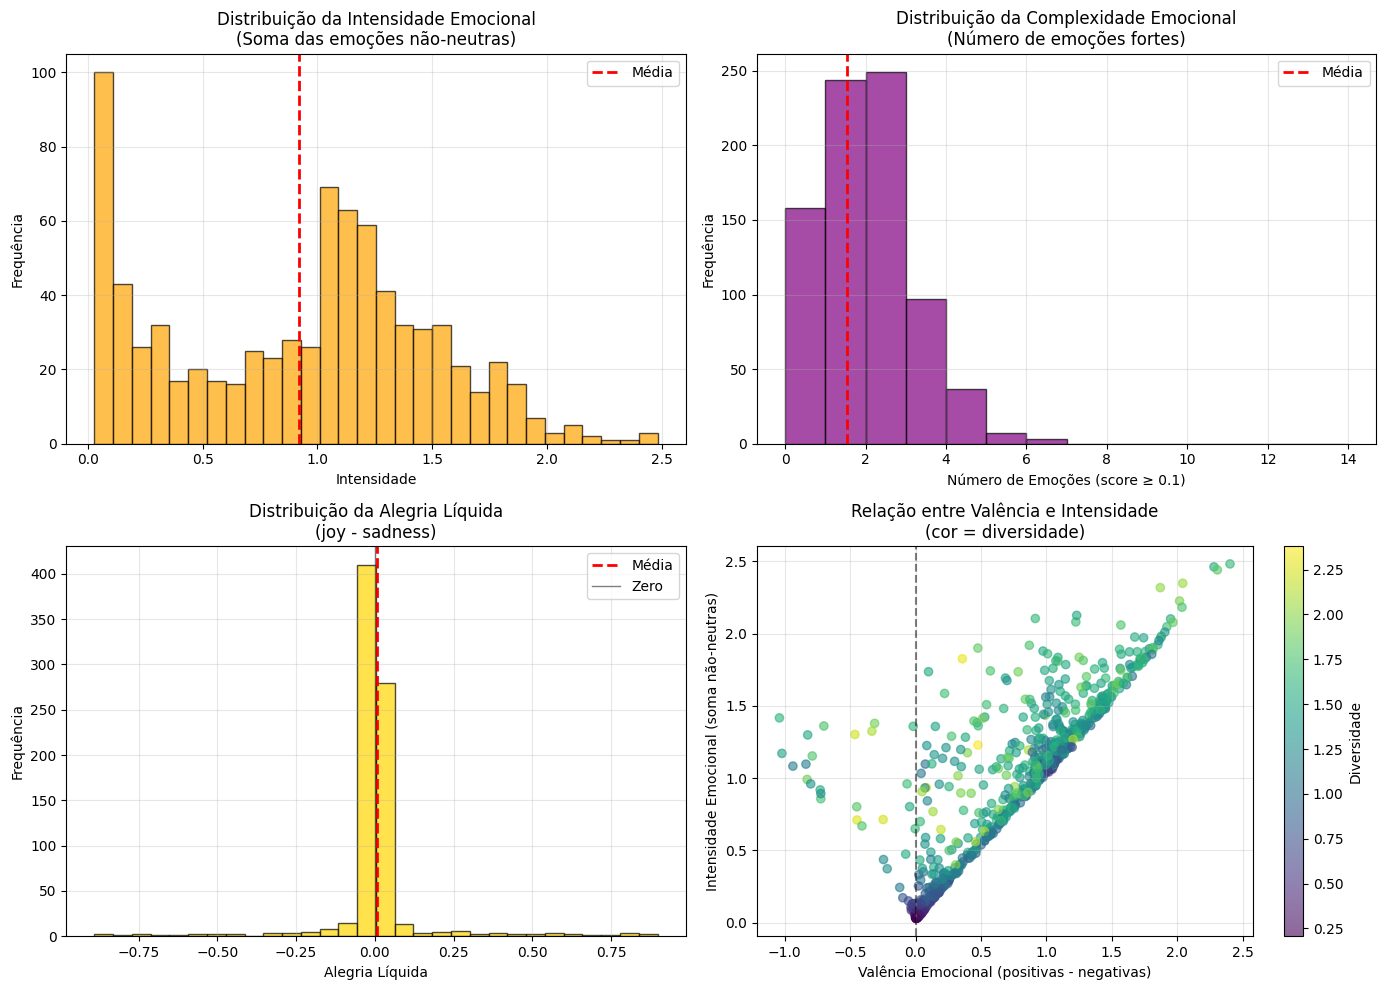



2. Rankings - Top Hinos por Diferentes Métricas
--------------------------------------------------------------------------------

--- TOP 10 HINOS MAIS ALEGRES (maior alegria líquida) ---
 1. SÓ O PODER DE DEUS                                 | Alegria: 0.897
 2. FELICIDADE É TER CRISTO AO MEU LADO                | Alegria: 0.850
 3. QUANDO A MÃO DE DEUS EM MIM VEIO TOCAR             | Alegria: 0.839
 4. ESTA ALEGRIA NÃO VAI MAIS SAIR                     | Alegria: 0.819
 5. QUE ALEGRIA                                        | Alegria: 0.817
 6. ÀS VEZES, ALGUÉM ME PERGUNTA                       | Alegria: 0.800
 7. QUANDO JESUS UM DIA                                | Alegria: 0.786
 8. SE PAZ, A MAIS DOCE                                | Alegria: 0.750
 9. NÃO TEREI MAIS TRISTEZAS                           | Alegria: 0.696
10. UMA CERTA VEZ, JESUS CRISTO                        | Alegria: 0.628

--- TOP 10 HINOS MAIS TRISTES (menor alegria líquida) ---
 1. UMA LUZ BRILHOU EM MEU CAMI

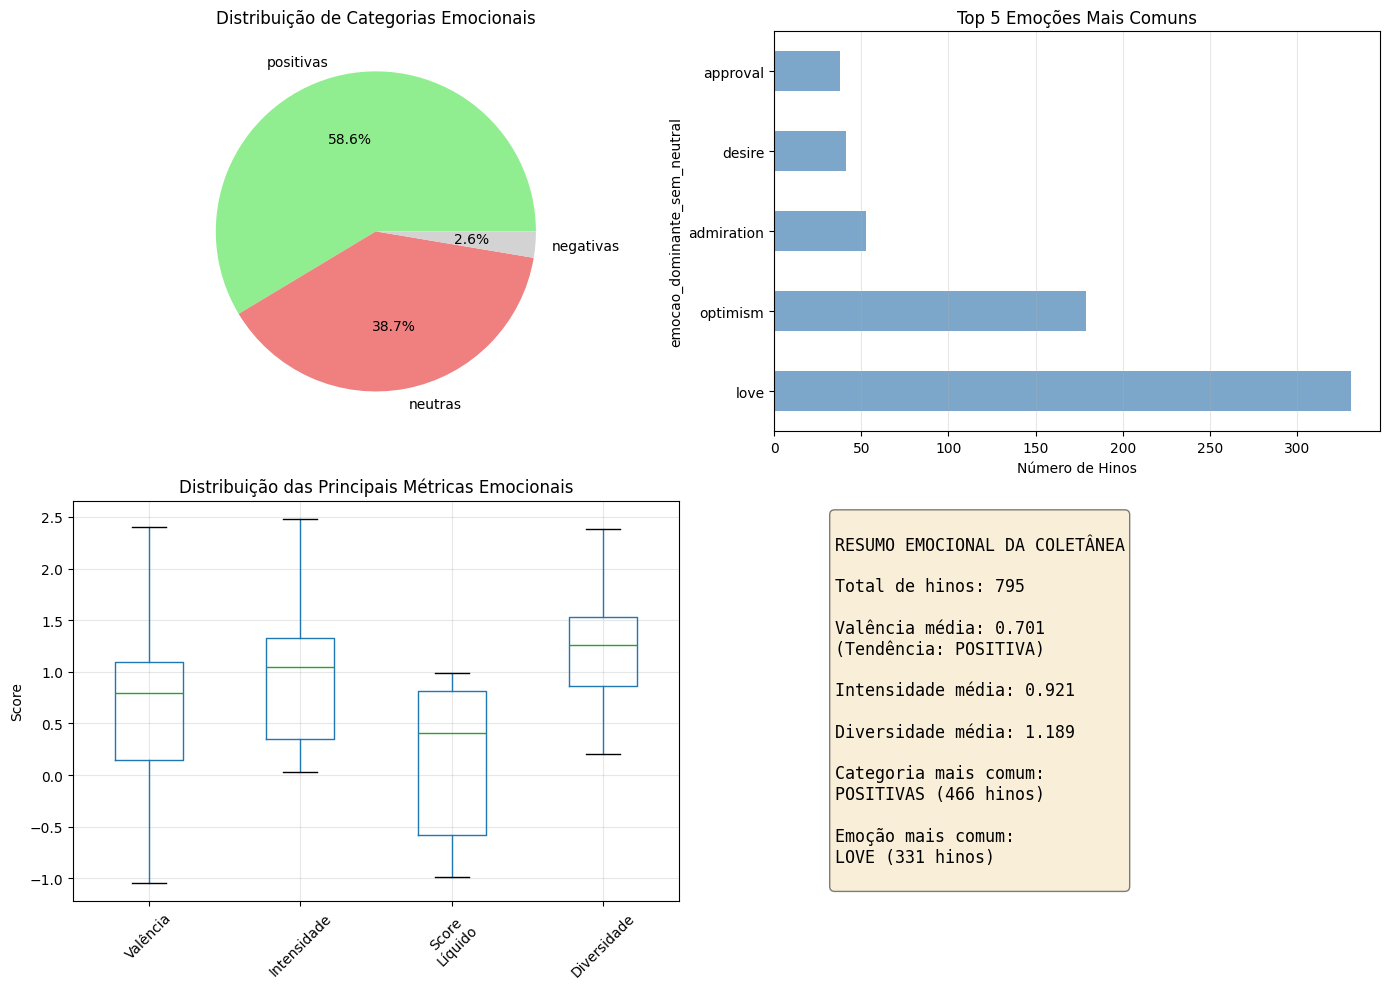


ANÁLISES COMPLETAS - TODAS AS MÉTRICAS AGREGADAS CALCULADAS!


In [27]:
# ===== MÉTRICAS AGREGADAS: SCORES COMPOSTOS E RANKINGS =====

print("="*80)
print("MÉTRICAS AGREGADAS - SCORES COMPOSTOS E RANKINGS")
print("="*80)

# 1. CRIAR SCORES EMOCIONAIS COMPOSTOS
print("\n1. Criação de Scores Emocionais Compostos")
print("-" * 80)

# Já temos:
# - valencia_emocional (positivas - negativas)
# - score_liquido (emoção dominante - neutral)

# Adicionar:
# - Intensidade emocional total (soma das emoções não-neutras)
def calcular_intensidade_emocional(emocoes):
    """Soma dos scores de todas as emoções exceto neutral"""
    if not emocoes:
        return 0.0
    return sum(v for k, v in emocoes.items() if k != 'neutral')

hinos_analise['intensidade_emocional'] = hinos_analise['emocoes'].apply(calcular_intensidade_emocional)

# - Complexidade emocional (número de emoções acima de um threshold)
def calcular_num_emocoes_fortes(emocoes, threshold=0.1):
    """Conta quantas emoções têm score acima do threshold"""
    if not emocoes:
        return 0
    return sum(1 for k, v in emocoes.items() if v >= threshold and k != 'neutral')

hinos_analise['num_emocoes_fortes'] = hinos_analise['emocoes'].apply(calcular_num_emocoes_fortes)

# - Score de "Alegria Líquida" (joy - sadness)
def calcular_alegria_liquida(emocoes):
    if not emocoes:
        return 0.0
    joy = emocoes.get('joy', 0.0)
    sadness = emocoes.get('sadness', 0.0)
    return joy - sadness

hinos_analise['alegria_liquida'] = hinos_analise['emocoes'].apply(calcular_alegria_liquida)

print("\n--- Estatísticas dos Scores Compostos ---")
print(f"Intensidade emocional média: {hinos_analise['intensidade_emocional'].mean():.3f}")
print(f"Número médio de emoções fortes: {hinos_analise['num_emocoes_fortes'].mean():.2f}")
print(f"Alegria líquida média: {hinos_analise['alegria_liquida'].mean():.3f}")

# Visualizar
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Intensidade emocional
axes[0, 0].hist(hinos_analise['intensidade_emocional'], bins=30, color='orange', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(hinos_analise['intensidade_emocional'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[0, 0].set_title("Distribuição da Intensidade Emocional\n(Soma das emoções não-neutras)")
axes[0, 0].set_xlabel("Intensidade")
axes[0, 0].set_ylabel("Frequência")
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Número de emoções fortes
axes[0, 1].hist(hinos_analise['num_emocoes_fortes'], bins=range(0, 15), color='purple', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(hinos_analise['num_emocoes_fortes'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[0, 1].set_title("Distribuição da Complexidade Emocional\n(Número de emoções fortes)")
axes[0, 1].set_xlabel("Número de Emoções (score ≥ 0.1)")
axes[0, 1].set_ylabel("Frequência")
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Alegria líquida
axes[1, 0].hist(hinos_analise['alegria_liquida'], bins=30, color='gold', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(hinos_analise['alegria_liquida'].mean(), color='red', linestyle='--', linewidth=2, label='Média')
axes[1, 0].axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Zero')
axes[1, 0].set_title("Distribuição da Alegria Líquida\n(joy - sadness)")
axes[1, 0].set_xlabel("Alegria Líquida")
axes[1, 0].set_ylabel("Frequência")
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Scatter: valencia vs intensidade
scatter = axes[1, 1].scatter(
    hinos_analise['valencia_emocional'],
    hinos_analise['intensidade_emocional'],
    c=hinos_analise['diversidade_emocional'],
    cmap='viridis',
    alpha=0.6
)
axes[1, 1].axvline(0, color='black', linestyle='--', alpha=0.5)
axes[1, 1].set_xlabel("Valência Emocional (positivas - negativas)")
axes[1, 1].set_ylabel("Intensidade Emocional (soma não-neutras)")
axes[1, 1].set_title("Relação entre Valência e Intensidade\n(cor = diversidade)")
axes[1, 1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1, 1], label='Diversidade')

plt.tight_layout()
plt.show()


# 2. RANKINGS E COMPARAÇÕES
print("\n\n2. Rankings - Top Hinos por Diferentes Métricas")
print("-" * 80)

# Top mais alegres
print("\n--- TOP 10 HINOS MAIS ALEGRES (maior alegria líquida) ---")
top_alegres = hinos_analise.nlargest(10, 'alegria_liquida')
for i, row in enumerate(top_alegres.iterrows(), 1):
    idx, hino = row
    print(f"{i:2d}. {hino['nome'][:50]:<50s} | Alegria: {hino['alegria_liquida']:.3f}")

# Top mais tristes
print("\n--- TOP 10 HINOS MAIS TRISTES (menor alegria líquida) ---")
top_tristes = hinos_analise.nsmallest(10, 'alegria_liquida')
for i, row in enumerate(top_tristes.iterrows(), 1):
    idx, hino = row
    print(f"{i:2d}. {hino['nome'][:50]:<50s} | Alegria: {hino['alegria_liquida']:.3f}")

# Top mais intensos
print("\n--- TOP 10 HINOS MAIS INTENSOS EMOCIONALMENTE ---")
top_intensos = hinos_analise.nlargest(10, 'intensidade_emocional')
for i, row in enumerate(top_intensos.iterrows(), 1):
    idx, hino = row
    print(f"{i:2d}. {hino['nome'][:50]:<50s} | Intensidade: {hino['intensidade_emocional']:.3f}")

# Top mais complexos emocionalmente
print("\n--- TOP 10 HINOS MAIS COMPLEXOS (múltiplas emoções) ---")
top_complexos = hinos_analise.nlargest(10, 'num_emocoes_fortes')
for i, row in enumerate(top_complexos.iterrows(), 1):
    idx, hino = row
    print(f"{i:2d}. {hino['nome'][:50]:<50s} | Emoções fortes: {hino['num_emocoes_fortes']}")

# Top mais positivos
print("\n--- TOP 10 HINOS MAIS POSITIVOS (maior valencia) ---")
top_positivos = hinos_analise.nlargest(10, 'valencia_emocional')
for i, row in enumerate(top_positivos.iterrows(), 1):
    idx, hino = row
    print(f"{i:2d}. {hino['nome'][:50]:<50s} | Valência: {hino['valencia_emocional']:.3f}")


# 3. RESUMO GERAL DA COLETÂNEA
print("\n\n3. Resumo Geral - Perfil Emocional da Coletânea")
print("-" * 80)

print(f"\nTotal de hinos analisados: {len(hinos_analise)}")
print(f"\n--- EMOÇÃO MÉDIA DA COLETÂNEA ---")
print(f"Valência emocional: {hinos_analise['valencia_emocional'].mean():.3f}")
print(f"  ➜ {'POSITIVA' if hinos_analise['valencia_emocional'].mean() > 0 else 'NEGATIVA'}")

print(f"\nIntensidade emocional: {hinos_analise['intensidade_emocional'].mean():.3f}")
print(f"Score líquido médio: {hinos_analise['score_liquido'].mean():.3f}")
print(f"Diversidade emocional média: {hinos_analise['diversidade_emocional'].mean():.3f}")

print(f"\n--- DISTRIBUIÇÃO POR CATEGORIA ---")
cat_dist = hinos_analise['categoria_dominante'].value_counts()
for cat, count in cat_dist.items():
    pct = (count / len(hinos_analise)) * 100
    print(f"{cat.capitalize():12s}: {count:3d} hinos ({pct:5.1f}%)")

print(f"\n--- TOP 5 EMOÇÕES MAIS COMUNS ---")
top_emocoes_geral = hinos_analise['emocao_dominante_sem_neutral'].value_counts().head(5)
for emocao, count in top_emocoes_geral.items():
    pct = (count / len(hinos_analise)) * 100
    print(f"{emocao.capitalize():12s}: {count:3d} hinos ({pct:5.1f}%)")

# Criar um resumo visual final
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Distribuição de categorias
cat_dist.plot(kind='pie', autopct='%1.1f%%', ax=axes[0, 0], colors=['lightgreen', 'lightcoral', 'lightgray'])
axes[0, 0].set_title("Distribuição de Categorias Emocionais")
axes[0, 0].set_ylabel("")

# 2. Top emoções
top_emocoes_geral.plot(kind='barh', ax=axes[0, 1], color='steelblue', alpha=0.7)
axes[0, 1].set_title("Top 5 Emoções Mais Comuns")
axes[0, 1].set_xlabel("Número de Hinos")
axes[0, 1].grid(axis='x', alpha=0.3)

# 3. Box plot das métricas principais
metricas_principais = hinos_analise[['valencia_emocional', 'intensidade_emocional', 'score_liquido', 'diversidade_emocional']]
metricas_principais.boxplot(ax=axes[1, 0])
axes[1, 0].set_title("Distribuição das Principais Métricas Emocionais")
axes[1, 0].set_ylabel("Score")
axes[1, 0].set_xticklabels(['Valência', 'Intensidade', 'Score\nLíquido', 'Diversidade'], rotation=45)
axes[1, 0].grid(alpha=0.3)

# 4. Resumo em texto
axes[1, 1].axis('off')
resumo_texto = f"""
RESUMO EMOCIONAL DA COLETÂNEA

Total de hinos: {len(hinos_analise)}

Valência média: {hinos_analise['valencia_emocional'].mean():.3f}
(Tendência: {'POSITIVA' if hinos_analise['valencia_emocional'].mean() > 0 else 'NEGATIVA'})

Intensidade média: {hinos_analise['intensidade_emocional'].mean():.3f}

Diversidade média: {hinos_analise['diversidade_emocional'].mean():.3f}

Categoria mais comum:
{cat_dist.index[0].upper()} ({cat_dist.iloc[0]} hinos)

Emoção mais comum:
{top_emocoes_geral.index[0].upper()} ({top_emocoes_geral.iloc[0]} hinos)
"""
axes[1, 1].text(0.1, 0.5, resumo_texto, fontsize=12, verticalalignment='center', 
                family='monospace', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("ANÁLISES COMPLETAS - TODAS AS MÉTRICAS AGREGADAS CALCULADAS!")
print("="*80)

---

## 📊 Sumário das Análises Implementadas

Este notebook foi significativamente expandido com análises profundas sobre o perfil emocional dos hinos. Aqui está o que foi implementado:

### ✅ 1. Análises Estatísticas Profundas
- **Distribuição Conjunta de Emoções**: Matriz de correlação mostrando como diferentes emoções se relacionam
- **Diversidade Emocional**: Cálculo de entropia (Shannon) e índice de concentração para medir a variedade emocional
- **Análise Temporal/Sequencial**: Distribuição de emoções ao longo da posição na coletânea

### ✅ 2. Análises Comparativas Melhoradas
- **Score Líquido Emocional**: Diferença entre emoção dominante e neutral (força emocional relativa)
- **Agrupamento por Categorias**: Emoções positivas, negativas e neutras agregadas
- **Valência Emocional**: Métrica composta (positivas - negativas)

### ✅ 3. Visualizações Avançadas
- **Gráficos de Radar/Spider**: Perfis emocionais visuais para hinos individuais e grupos
- Comparação visual entre diferentes categorias emocionais

### ✅ 4. Análises Contextuais
- **Relação com Extensão do Texto**: Como o tamanho influencia as emoções
- **Complexidade Léxica**: Type-token ratio e sua relação com emoções

### ✅ 5. Análises de Casos Extremos
- **Top hinos por cada emoção**: Os 3 exemplos mais representativos de cada emoção
- **Hinos atípicos**: Perfis emocionais mais únicos/distantes da média
- **Casos surpreendentes**: Hinos negativos, balanceados, etc.

### ✅ 6. Métricas Agregadas
- **Scores Compostos**: Intensidade emocional, complexidade, alegria líquida
- **Rankings**: Top 10 em diversas categorias (mais alegres, tristes, intensos, complexos, positivos)
- **Resumo Geral**: Perfil emocional médio da coletânea completa

### 🎯 Principais Insights Obtidos

Com essas análises, agora podemos responder perguntas como:
- Quais emoções tendem a aparecer juntas?
- Alguns hinos são mais "puros" emocionalmente do que outros?
- Há padrões de emoções conforme a posição na coletânea?
- Hinos maiores têm perfis emocionais diferentes?
- Quais são os hinos mais representativos de cada emoção?
- Qual é o "tom" emocional geral da coletânea?

---

ANÁLISES COMPARATIVAS - SUBSTITUINDO 'COM/SEM NEUTRAL'

1. SCORE LÍQUIDO EMOCIONAL
--------------------------------------------------------------------------------
Score líquido médio: 0.157
Score líquido mínimo: -0.989
Score líquido máximo: 0.990


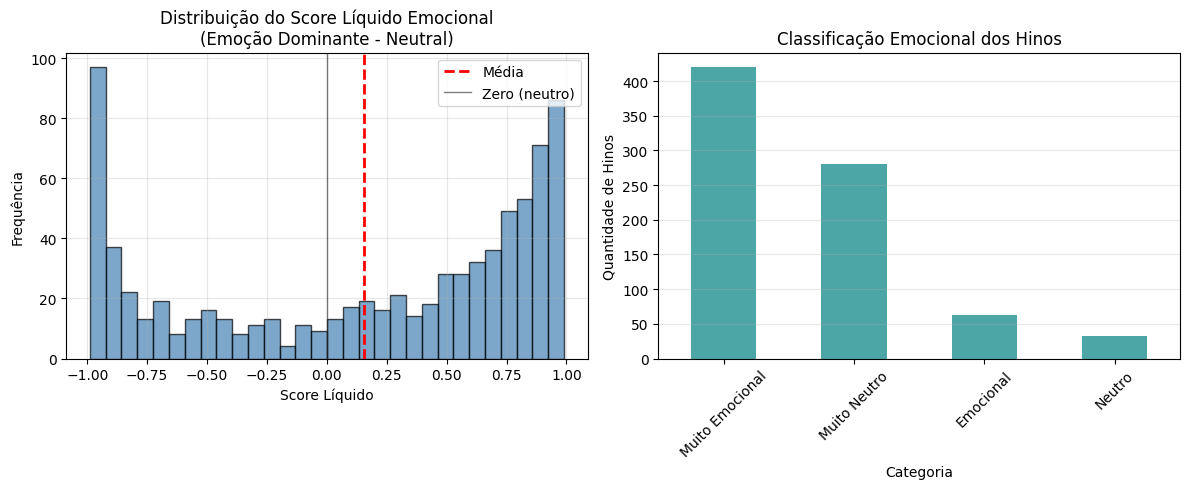


--- Hinos MAIS EMOCIONALMENTE CARREGADOS (score líquido alto) ---
1. QUERO ANDAR EM TEU CAMINHO, SENHOR
   Score líquido: 0.990 | Emoção: gratitude
   Neutral: 0.002 | gratitude: 0.992
2. GRANDE É O SENHOR E MUI  DIGNO DE SER LOUVADO
   Score líquido: 0.987 | Emoção: admiration
   Neutral: 0.003 | admiration: 0.990
3. LINDO! LINDO! LINDO!
   Score líquido: 0.984 | Emoção: admiration
   Neutral: 0.006 | admiration: 0.990
4. ELE É A MINHA ALEGRIA
   Score líquido: 0.984 | Emoção: gratitude
   Neutral: 0.008 | gratitude: 0.992
5. SENHOR, TE AMO, TE AMO
   Score líquido: 0.979 | Emoção: love
   Neutral: 0.007 | love: 0.986

--- Hinos MAIS NEUTROS (score líquido baixo/negativo) ---
1. SOMENTE PELA FÉ A OBRA DE DEUS
   Score líquido: -0.989
   Neutral: 0.993
2. INVOCA-ME E TE RESPONDEREI
   Score líquido: -0.989
   Neutral: 0.992
3. É PRECISO CONFIAR E BUSCAR A DEUS
   Score líquido: -0.988
   Neutral: 0.992
4. TOMAI AGORA O PÃO
   Score líquido: -0.988
   Neutral: 0.992
5. O ANJO DO SENHOR

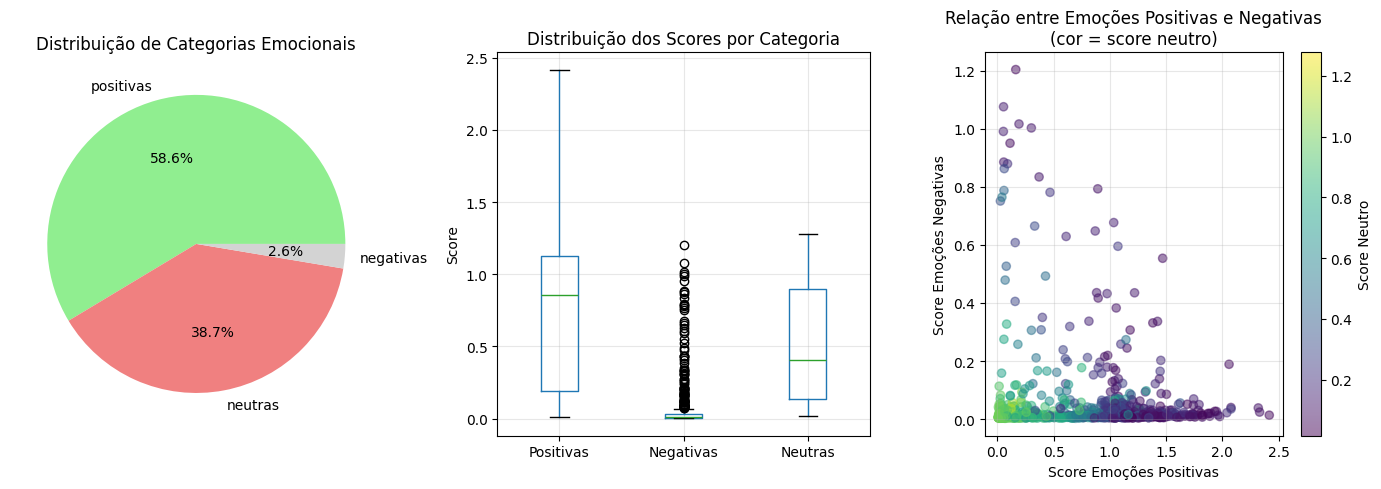


--- Estatísticas por Categoria ---
Score médio positivas: 0.758
Score médio negativas: 0.057
Score médio neutras: 0.493

Valência emocional média: 0.701
  (Valores positivos = mais alegre/positivo, negativos = mais triste/negativo)

ANÁLISES COMPARATIVAS CONCLUÍDAS!


In [28]:
# ===== ANÁLISES COMPARATIVAS MELHORADAS =====

print("="*80)
print("ANÁLISES COMPARATIVAS - SUBSTITUINDO 'COM/SEM NEUTRAL'")
print("="*80)

# 1. SCORE LÍQUIDO EMOCIONAL (força emocional relativa ao neutral)
print("\n1. SCORE LÍQUIDO EMOCIONAL")
print("-" * 80)

def calcular_score_liquido(emocoes):
    """Calcula a diferença entre emoção dominante (não-neutral) e neutral"""
    if not emocoes:
        return 0.0, "unknown"
    
    score_neutral = emocoes.get("neutral", 0.0)
    emocoes_sem_neutral = {k: v for k, v in emocoes.items() if k != "neutral"}
    
    if emocoes_sem_neutral:
        top_emocao, top_score = max(emocoes_sem_neutral.items(), key=lambda x: x[1])
        return top_score - score_neutral, top_emocao
    return 0.0, "unknown"

# Aplicar cálculo
scores_liquidos = hinos_analise["emocoes"].apply(calcular_score_liquido)
hinos_analise["score_liquido"] = scores_liquidos.apply(lambda x: x[0])
hinos_analise["emocao_dominante_nao_neutral"] = scores_liquidos.apply(lambda x: x[1])

print(f"Score líquido médio: {hinos_analise['score_liquido'].mean():.3f}")
print(f"Score líquido mínimo: {hinos_analise['score_liquido'].min():.3f}")
print(f"Score líquido máximo: {hinos_analise['score_liquido'].max():.3f}")

# Visualizar distribuição
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(hinos_analise["score_liquido"], bins=30, color="steelblue", alpha=0.7, edgecolor='black')
plt.axvline(hinos_analise["score_liquido"].mean(), color='red', linestyle='--', linewidth=2, label='Média')
plt.axvline(0, color='black', linestyle='-', linewidth=1, alpha=0.5, label='Zero (neutro)')
plt.title("Distribuição do Score Líquido Emocional\n(Emoção Dominante - Neutral)")
plt.xlabel("Score Líquido")
plt.ylabel("Frequência")
plt.legend()
plt.grid(alpha=0.3)

# Hinos mais emocionalmente carregados vs. mais neutros
plt.subplot(1, 2, 2)
bins = [-1, -0.1, 0.1, 0.3, 1]
labels = ['Muito Neutro', 'Neutro', 'Emocional', 'Muito Emocional']
hinos_analise['categoria_emocional'] = pd.cut(hinos_analise['score_liquido'], bins=bins, labels=labels)
hinos_analise['categoria_emocional'].value_counts().plot(kind='bar', color='teal', alpha=0.7)
plt.title("Classificação Emocional dos Hinos")
plt.xlabel("Categoria")
plt.ylabel("Quantidade de Hinos")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Exemplos
print("\n--- Hinos MAIS EMOCIONALMENTE CARREGADOS (score líquido alto) ---")
mais_emocionais = hinos_analise.nlargest(5, "score_liquido")
for i, row in enumerate(mais_emocionais.iterrows(), 1):
    idx, hino = row
    print(f"{i}. {hino['nome'][:50]}")
    print(f"   Score líquido: {hino['score_liquido']:.3f} | Emoção: {hino['emocao_dominante_nao_neutral']}")
    if hino['emocoes']:
        print(f"   Neutral: {hino['emocoes'].get('neutral', 0):.3f} | {hino['emocao_dominante_nao_neutral']}: {max([v for k,v in hino['emocoes'].items() if k != 'neutral'], default=0):.3f}")

print("\n--- Hinos MAIS NEUTROS (score líquido baixo/negativo) ---")
mais_neutros = hinos_analise.nsmallest(5, "score_liquido")
for i, row in enumerate(mais_neutros.iterrows(), 1):
    idx, hino = row
    print(f"{i}. {hino['nome'][:50]}")
    print(f"   Score líquido: {hino['score_liquido']:.3f}")
    if hino['emocoes']:
        print(f"   Neutral: {hino['emocoes'].get('neutral', 0):.3f}")


# 2. AGRUPAMENTO DE EMOÇÕES POR CATEGORIA
print("\n\n2. AGRUPAMENTO DE EMOÇÕES POR CATEGORIA")
print("-" * 80)

# Definir categorias (ajustar conforme as emoções do modelo)
CATEGORIAS_EMOCOES = {
    'positivas': ['joy', 'love', 'admiration', 'approval', 'caring', 'excitement', 'gratitude', 'optimism', 'pride', 'relief'],
    'negativas': ['anger', 'disgust', 'fear', 'sadness', 'disappointment', 'embarrassment', 'grief', 'nervousness', 'remorse'],
    'neutras': ['neutral', 'realization', 'surprise', 'confusion', 'curiosity', 'desire', 'amusement']
}

def calcular_score_categoria(emocoes, categoria):
    """Soma os scores de todas as emoções de uma categoria"""
    if not emocoes:
        return 0.0
    emocoes_da_categoria = CATEGORIAS_EMOCOES.get(categoria, [])
    return sum(emocoes.get(emocao, 0.0) for emocao in emocoes_da_categoria)

# Aplicar para cada categoria
for categoria in ['positivas', 'negativas', 'neutras']:
    hinos_analise[f'score_{categoria}'] = hinos_analise['emocoes'].apply(
        lambda x: calcular_score_categoria(x, categoria)
    )

# Categoria dominante
def categoria_dominante(row):
    scores = {
        'positivas': row['score_positivas'],
        'negativas': row['score_negativas'],
        'neutras': row['score_neutras']
    }
    return max(scores.items(), key=lambda x: x[1])[0]

hinos_analise['categoria_dominante'] = hinos_analise.apply(categoria_dominante, axis=1)

# Visualizar
print("\n--- Distribuição por Categoria Emocional ---")
categoria_counts = hinos_analise['categoria_dominante'].value_counts()
print(categoria_counts)

plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
categoria_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral', 'lightgray'])
plt.title("Distribuição de Categorias Emocionais")
plt.ylabel("")

plt.subplot(1, 3, 2)
hinos_analise[['score_positivas', 'score_negativas', 'score_neutras']].boxplot()
plt.title("Distribuição dos Scores por Categoria")
plt.ylabel("Score")
plt.xticks([1, 2, 3], ['Positivas', 'Negativas', 'Neutras'])
plt.grid(alpha=0.3)

plt.subplot(1, 3, 3)
# Scatter: positivas vs negativas
plt.scatter(hinos_analise['score_positivas'], hinos_analise['score_negativas'], 
            alpha=0.5, c=hinos_analise['score_neutras'], cmap='viridis')
plt.xlabel('Score Emoções Positivas')
plt.ylabel('Score Emoções Negativas')
plt.title('Relação entre Emoções Positivas e Negativas\n(cor = score neutro)')
plt.colorbar(label='Score Neutro')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Estatísticas
print("\n--- Estatísticas por Categoria ---")
print(f"Score médio positivas: {hinos_analise['score_positivas'].mean():.3f}")
print(f"Score médio negativas: {hinos_analise['score_negativas'].mean():.3f}")
print(f"Score médio neutras: {hinos_analise['score_neutras'].mean():.3f}")

# Valência emocional geral (positivas - negativas)
hinos_analise['valencia_emocional'] = hinos_analise['score_positivas'] - hinos_analise['score_negativas']
print(f"\nValência emocional média: {hinos_analise['valencia_emocional'].mean():.3f}")
print(f"  (Valores positivos = mais alegre/positivo, negativos = mais triste/negativo)")

print("\n" + "="*80)
print("ANÁLISES COMPARATIVAS CONCLUÍDAS!")
print("="*80)

---

**A seguir:** Análises estatísticas profundas - distribuição conjunta de emoções, diversidade emocional e padrões temporais.

---

**A seguir:** Visualização detalhada dos scores de emoções por hino, utilizando heatmap para destacar as emoções principais em uma amostra dos hinos.

Criando heatmap de emoções...


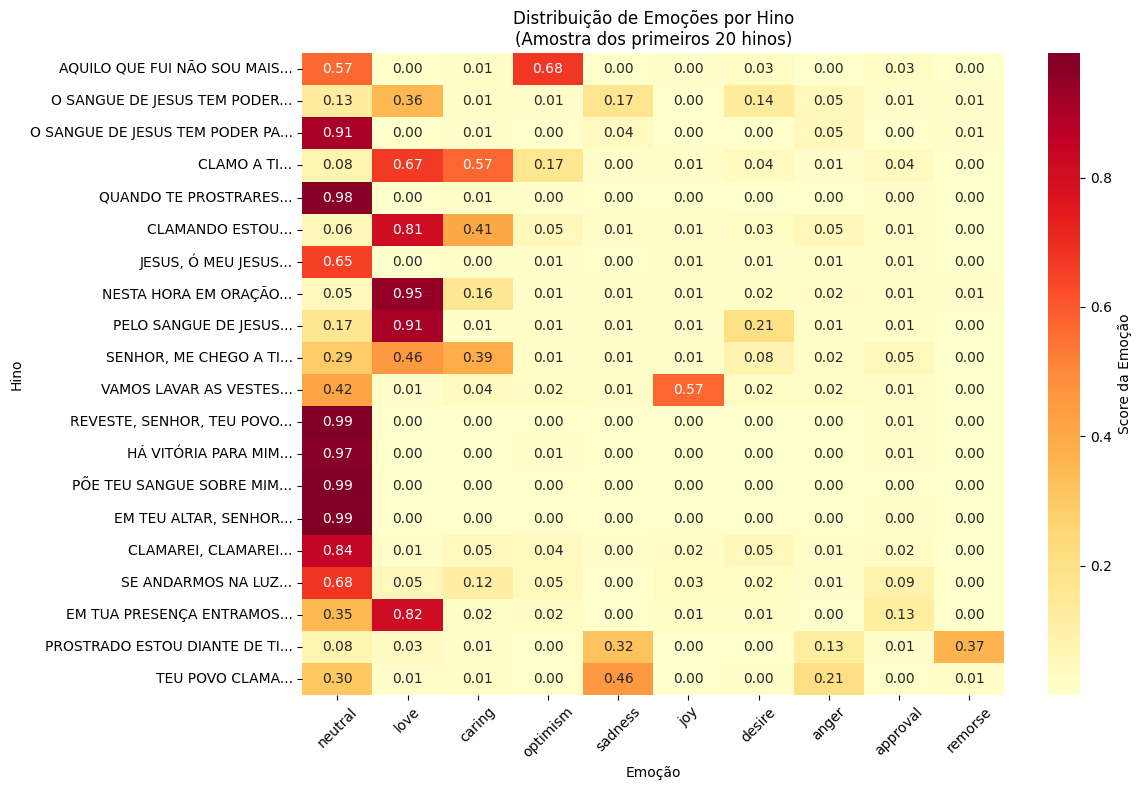

Heatmap criado com 20 hinos e 10 emoções principais.
Emoções visualizadas: ['neutral', 'love', 'caring', 'optimism', 'sadness', 'joy', 'desire', 'anger', 'approval', 'remorse']


In [29]:
# Visualização detalhada: Heatmap de emoções por hino
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar se os dados foram processados
if "emocoes" not in hinos_analise.columns:
    print("Execute as células anteriores primeiro para processar as emoções!")
else:
    print("Criando heatmap de emoções...")

    # Expandir as emoções em colunas numéricas para uma amostra
    # (usar todos os hinos seria muito denso para visualizar)
    amostra_viz = hinos_analise.head(20).copy()  # Primeiros 20 hinos

    # Criar dataframe com as emoções expandidas
    emocoes_expandidas = []
    nomes_hinos = []

    for idx, row in amostra_viz.iterrows():
        if row["emocoes"]:
            emocoes_expandidas.append(row["emocoes"])
            nomes_hinos.append(row["nome"][:30] + "...")  # Truncar nomes longos

    if emocoes_expandidas:
        emo_df = pd.DataFrame(emocoes_expandidas, index=nomes_hinos)

        # Selecionar apenas as emoções mais comuns para visualização
        emocoes_principais = emo_df.mean().nlargest(10).index
        emo_df_filtrado = emo_df[emocoes_principais]

        plt.figure(figsize=(12, 8))
        sns.heatmap(
            emo_df_filtrado,
            annot=True,
            cmap="YlOrRd",
            fmt=".2f",
            cbar_kws={"label": "Score da Emoção"},
        )
        plt.title("Distribuição de Emoções por Hino\n(Amostra dos primeiros 20 hinos)")
        plt.xlabel("Emoção")
        plt.ylabel("Hino")
        plt.xticks(rotation=45)
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()

        print(
            f"Heatmap criado com {len(emo_df_filtrado)} hinos e {len(emocoes_principais)} emoções principais."
        )
        print(f"Emoções visualizadas: {list(emocoes_principais)}")
    else:
        print("Nenhuma emoção foi processada com sucesso. Verifique os dados.")

---

**A seguir:** Extração das 3 emoções mais fortes por hino, para facilitar análises e visualizações futuras.

In [30]:
# Criar coluna com as 3 emoções mais dominantes (sem neutral)
def top3_emocoes_sem_neutral(emocoes):
    if not emocoes:
        return []
    # Remove 'neutral'
    emocoes_filtrado = {k: v for k, v in emocoes.items() if k != "neutral"}
    # Ordena por score (do maior para o menor)
    top3 = sorted(emocoes_filtrado.items(), key=lambda x: x[1], reverse=True)[:3]
    # Retorna só os nomes das emoções
    return [e[0] for e in top3]


hinos_analise["top3_emocoes"] = hinos_analise["emocoes"].apply(top3_emocoes_sem_neutral)

# Exemplo de visualização
print(hinos_analise[["nome", "top3_emocoes"]].head(10))

                                           nome  \
numero                                            
0                   AQUILO QUE FUI NÃO SOU MAIS   
1                   O SANGUE DE JESUS TEM PODER   
2       O SANGUE DE JESUS TEM PODER PARA SALVAR   
3                                    CLAMO A TI   
4                          QUANDO TE PROSTRARES   
5                                CLAMANDO ESTOU   
6                            JESUS, Ó MEU JESUS   
7                          NESTA HORA EM ORAÇÃO   
8                          PELO SANGUE DE JESUS   
9                         SENHOR, ME CHEGO A TI   

                              top3_emocoes  
numero                                      
0             [optimism, desire, approval]  
1                  [love, sadness, desire]  
2              [anger, sadness, annoyance]  
3                 [love, caring, optimism]  
4          [caring, realization, optimism]  
5                    [love, caring, anger]  
6       [excitement, amusem

---

**A seguir:** Salvamento dos resultados enriquecidos com análise de emoções para uso em outras etapas ou aplicações.

In [32]:
hinos_analise.to_pickle("..\\assets\\hinos_analise_emocoes.pkl")

---

**Fim do notebook:** Finalização do processamento, com os dados prontos para exportação e uso em outras análises ou aplicações.